# TIME SERIES HOMEWORK

1. Read the file ldeaths in the folder datasets of R. Make the graphical representation. Identify and estimate the trend, the seasonal component and the residual component. Are the residuals a sample of an IID noise?

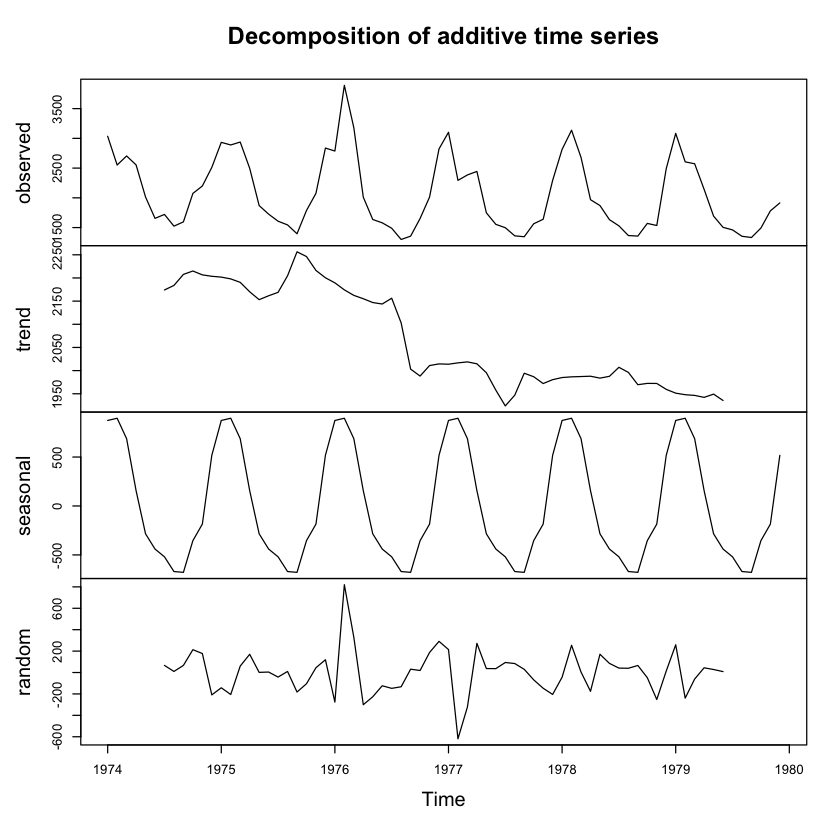


	Box-Ljung test

data:  residual
X-squared = 9.5538, df = 4.2767, p-value = 0.05827


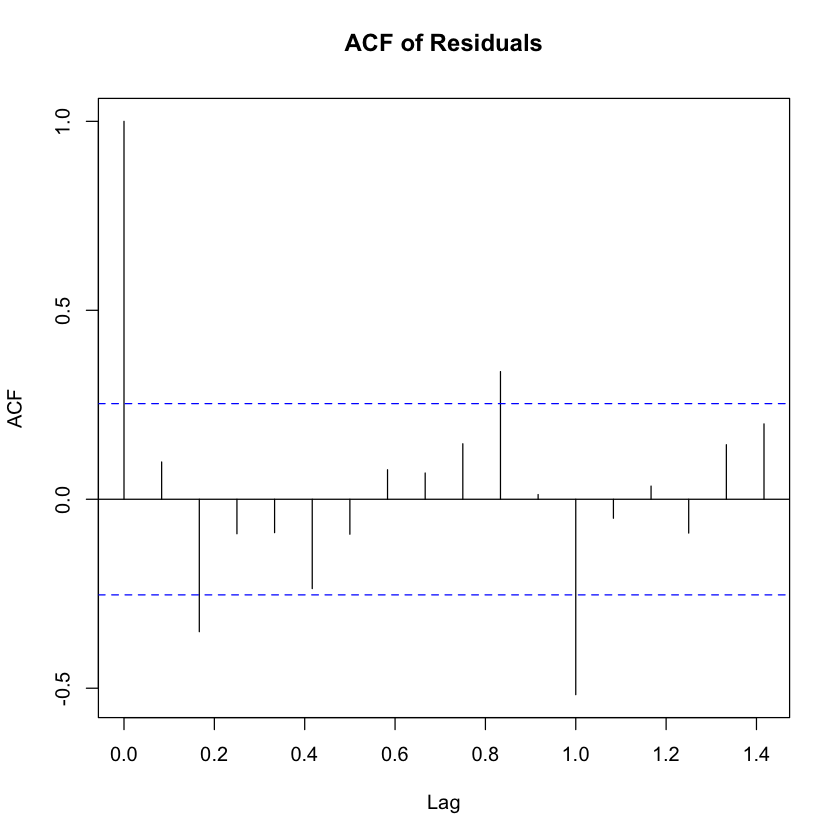

In [46]:
require(stats)
require(graphics)

# Graphical representation
#plot(ldeaths, main="Deaths from Lung Diseases", xlab="Time", ylab="Deaths", type="l")

# Decompose the time series using only moving average methods
decomp <- decompose(ldeaths)

# Plot decomposed components
plot(decomp)

# Access the decomposed components
trend <- decomp$trend
seasonal <- decomp$seasonal
residual <- decomp$random

# Plot autocorrelation function (ACF) of residuals, handling missing values
na.omit_resid <- na.omit(residual)
acf(na.omit_resid, main = "ACF of Residuals")

# Verify the IID character
Box.test(residual, lag=log(length(residual)), type=c("Ljung-Box"))


With the plot Decomposition of additive time series, we obtain the graphical representation of the data and then decomposed parts of the observed values, i.e. trend, seasonality and residuals. Right away from the observed plot, we see that a seasonality is present (cycle/year). Next, there is a negative overall trend present in the time series. To confirm the residulats are IID, we use the Ljung-Box test which is a method that tests for the absense of autocorrelation in residuals. If the p-value > 0.05, this implies that the residuals of the data are are independent. Since in our example, we have p-value = 0.05827 it doesn't suggest any evidence against the null hypothesis of independence in the residuals. In other words, it means that there does not seem to be significant autocorrelation present in the residuals but with a low confidence.

-------
------

2. Simulate a Gaussian white noise of n = 10.000 data. Verify by testing that it is an IID noise and a Gaussian white noise. Simulate a Gaussian Random Walk. Simulate IID noises of 10.000 data that are not a Gaussian white noise: a Poisson noise and an exponential noise. Test all what you can.

Mean: -0.004743404 
Variance: 3.989101 


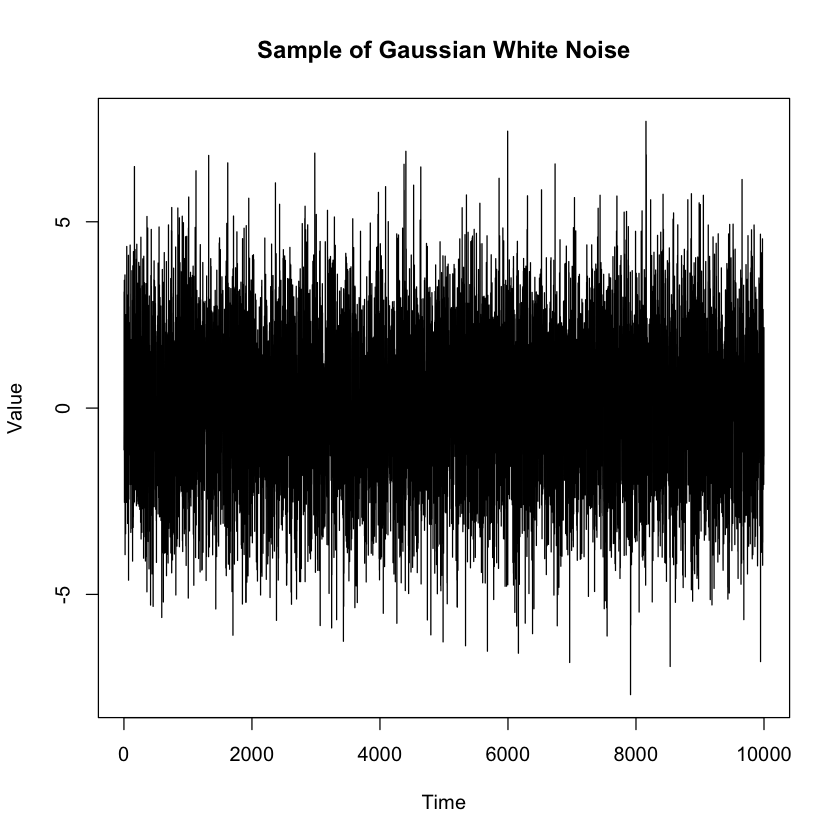

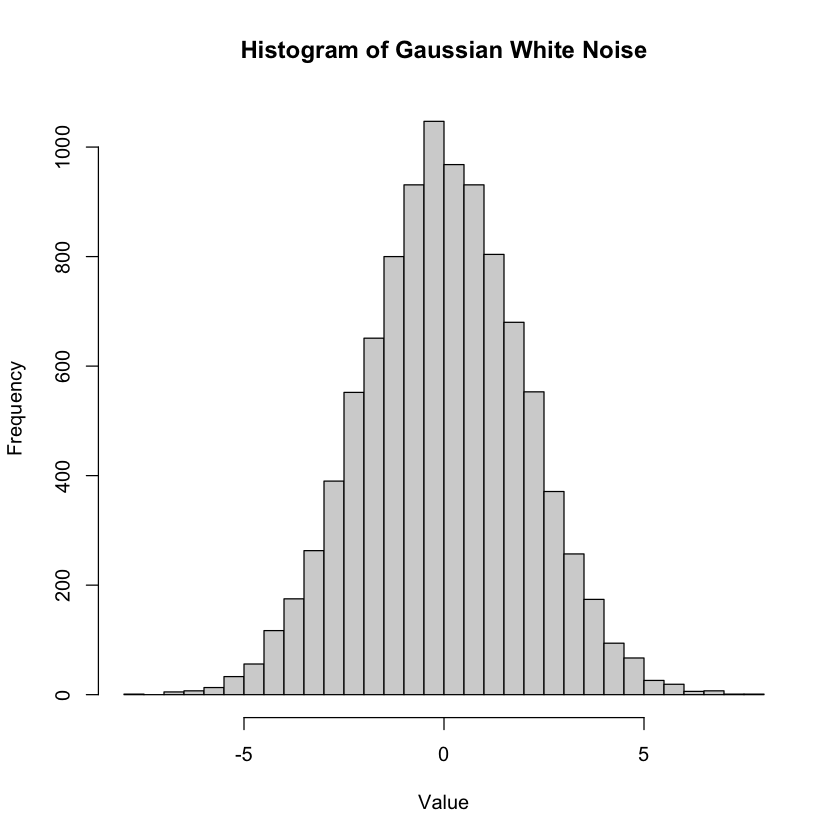


	Box-Ljung test

data:  gaussian_white_noise
X-squared = 5.6272, df = 9.2103, p-value = 0.7926


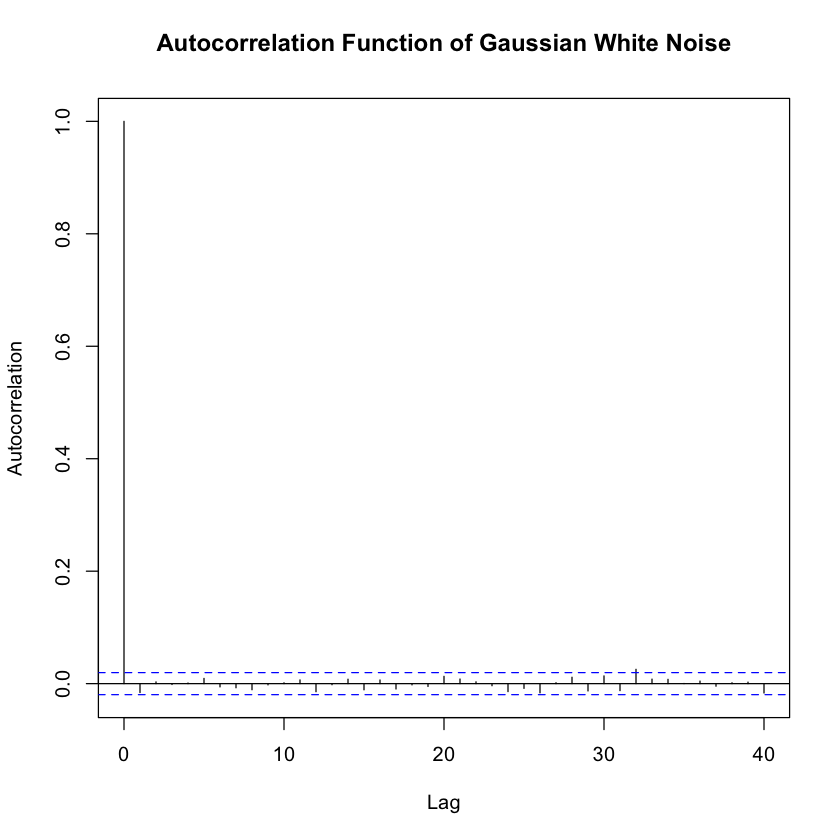

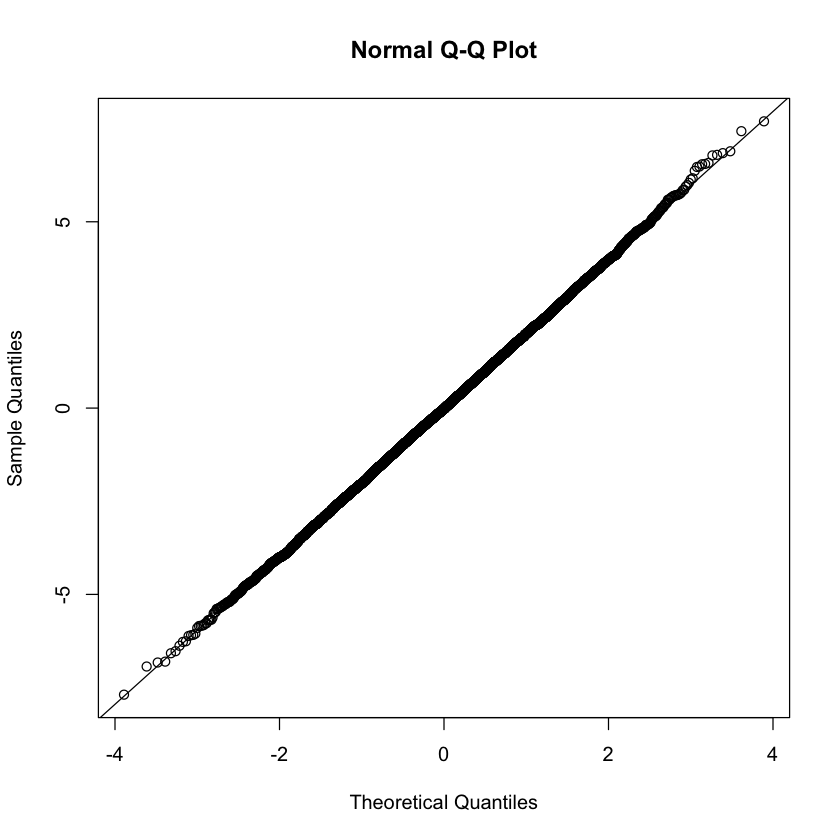

In [47]:
#########  Simulating Gaussian white noise  #########
n <- 10000
mu <- 0
sigma <- 2
set.seed(123) # for reproducibility
gaussian_white_noise <- rnorm(n, mean = mu, sd = sigma)

# Check mean and variance
mean_noise <- mean(gaussian_white_noise)
variance_noise <- var(gaussian_white_noise)
cat("Mean:", mean_noise, "\n")
cat("Variance:", variance_noise, "\n")

# Plot sample
plot(gaussian_white_noise, type = "l", main = "Sample of Gaussian White Noise",
     xlab = "Time", ylab = "Value")

# Plot histogram
hist(gaussian_white_noise, breaks = 30, main = "Histogram of Gaussian White Noise",
     xlab = "Value", ylab = "Frequency")

# Check autocorrelation
acf(gaussian_white_noise, main = "Autocorrelation Function of Gaussian White Noise",
    xlab = "Lag", ylab = "Autocorrelation")

# Verify the IID character
Box.test(gaussian_white_noise, lag=log(n), type=c("Ljung-Box"))

# Test the normal character 
qqnorm(gaussian_white_noise)
qqline(gaussian_white_noise)

After generating 10000 sample, we check the properties of the data. Starting by plotting the sample, histogram and autocorrelation function, we can observe that the correlation is close to zero which suggests IID Gausian white noise. With a p-value of 0.7926, which is much greater than 0.05, we do not have enough evidence to reject the null hypothesis. Therefore, we cannot conclude that there is significant autocorrelation in the series, which only further confirms the hypothesis. In other words, this suggests that the autocorrelations in simulated Gaussian white noise series are not statistically different from zero at the given significance level. Thus, the series exhibits characteristics consistent with white noise, where each value is independent of others. To support our eveidence, we use Q-Q-plot which shows a linear trend further supporting the hypothesis.

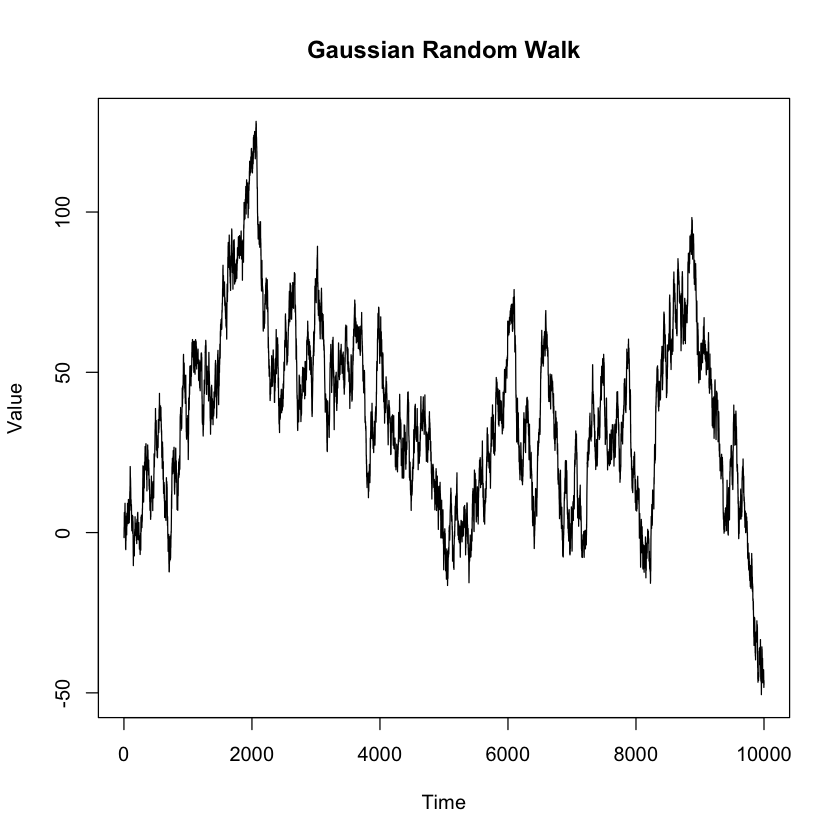

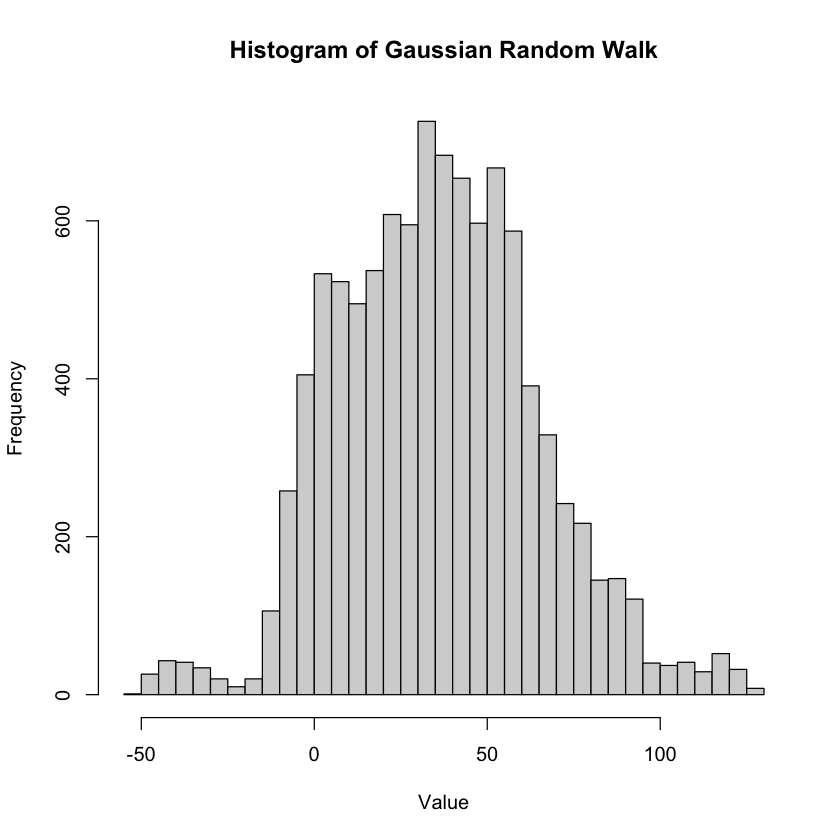

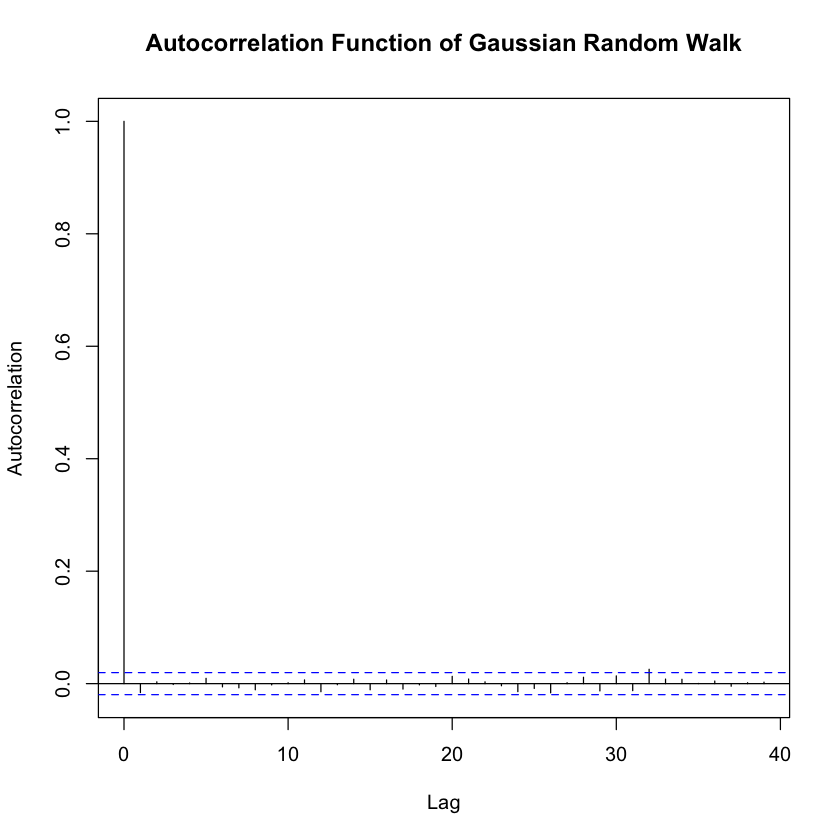

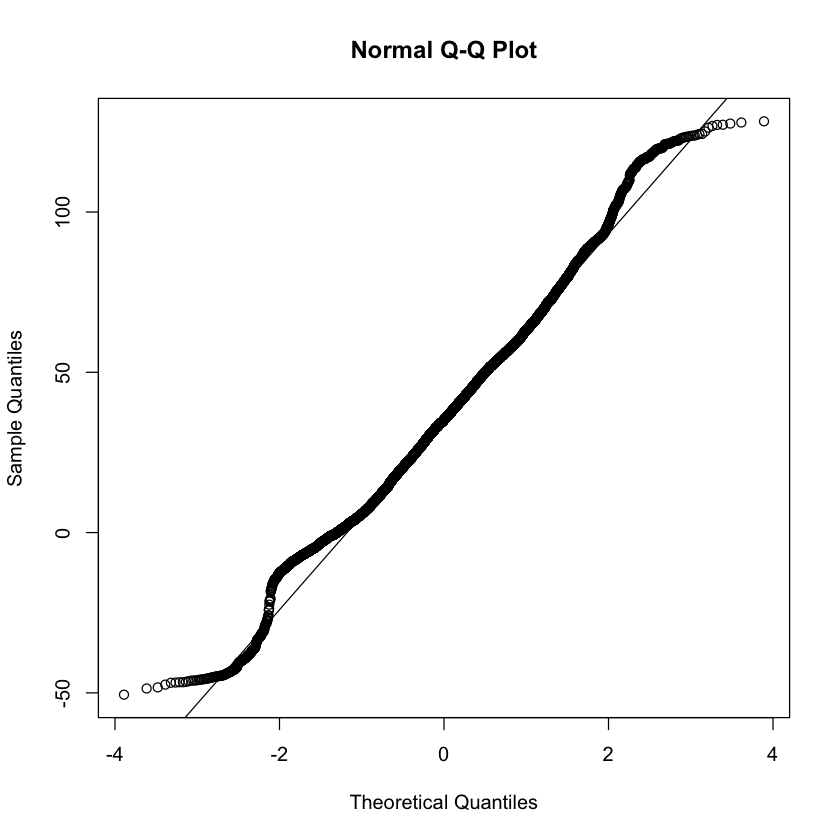

In [48]:
#########  Simulating Gaussian Random Walk  #########
gaussian_random_walk2 <- cumsum(gaussian_white_noise)

# Graphical representation of data
plot(gaussian_random_walk2, type = "l", main = "Gaussian Random Walk",
     xlab = "Time", ylab = "Value")

# Plot histogram
hist(gaussian_random_walk2, breaks = 30, main = "Histogram of Gaussian Random Walk",
     xlab = "Value", ylab = "Frequency")

# ACF plot
acf_diff <- acf(diff(gaussian_random_walk2), main = "Autocorrelation Function of Gaussian Random Walk",
                xlab = "Lag", ylab = "Autocorrelation")

# Verify the IID character
#Box.test(gaussian_random_walk2, lag=log(n), type=c("Ljung-Box"))

# Test the normal character 
qqnorm(gaussian_random_walk2)
qqline(gaussian_random_walk2)

# # now we perform the same with Gaussian white noises with mean and variance.
# gaussian_random_walk <- cumsum(gaussian_white_noise)
# plot(gaussian_random_walk, type = "l", main = "Gaussian Random Walk with mean and variance",
#      xlab = "Time", ylab = "Value")

# # ACF plot
# acf_diff <- acf(diff(gaussian_random_walk), main = "Autocorrelation Function of Gaussian Random Walk",
#                 xlab = "Lag", ylab = "Autocorrelation")

# # Verify the IID character
# Box.test(gaussian_random_walk, lag=log(n), type=c("Ljung-Box"))

# # Test the normal character 
# qqnorm(gaussian_random_walk)
# qqline(gaussian_random_walk)

We use our previous result to simulate the Gaussian Random Walk. We take the cumulative sum of the data. Then to see the IID, we plot the correlation function with differenced data. We have that the differenced has no correlation as expected.

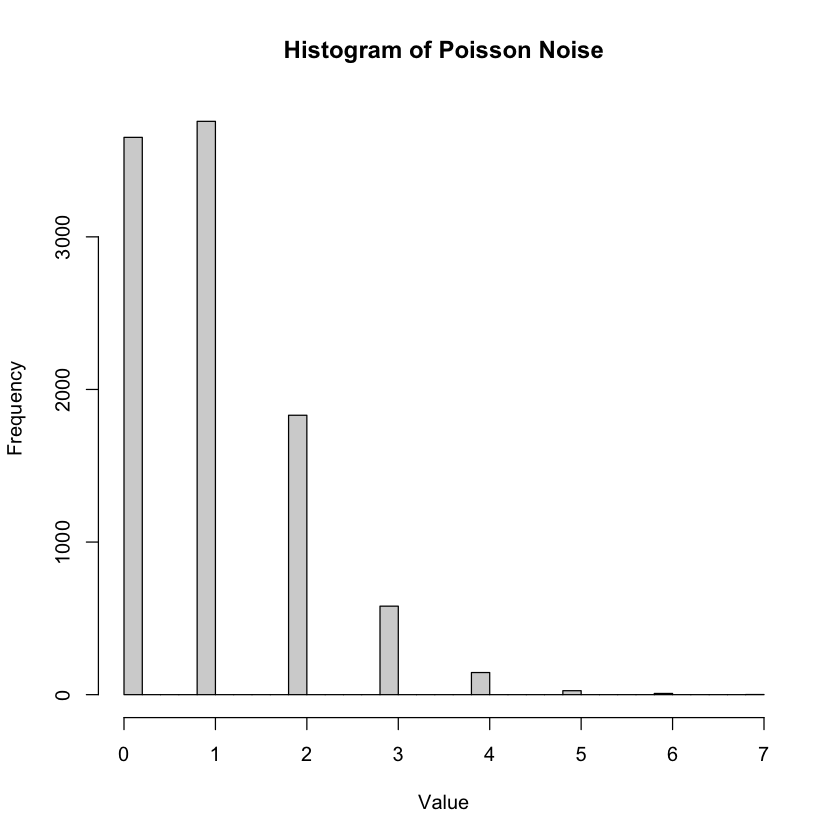


	Box-Ljung test

data:  poisson_noise
X-squared = 5.0985, df = 9.2103, p-value = 0.8396


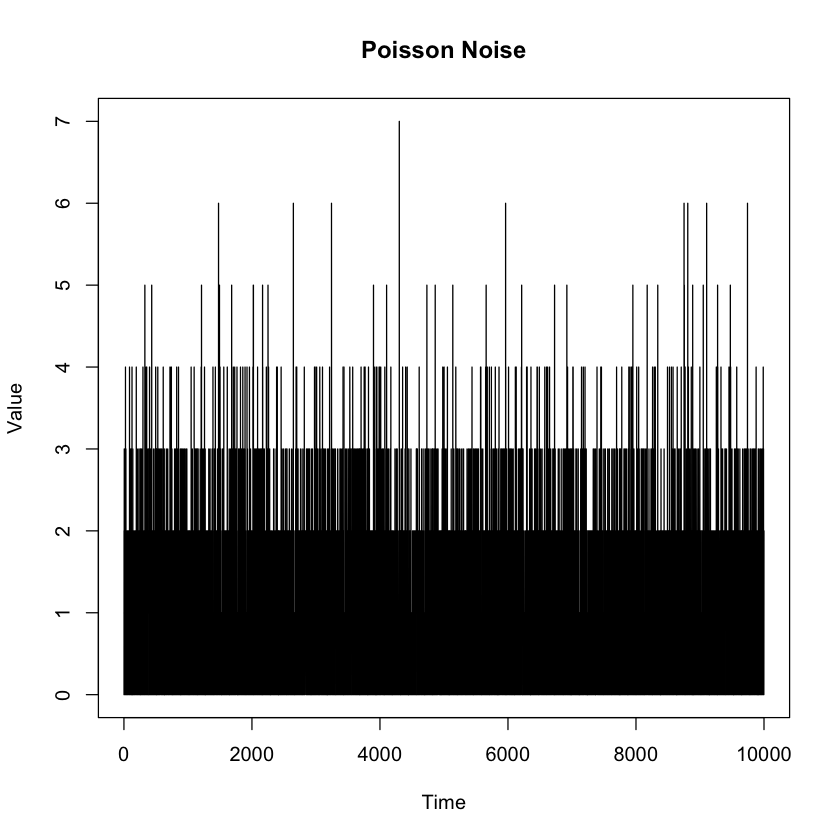

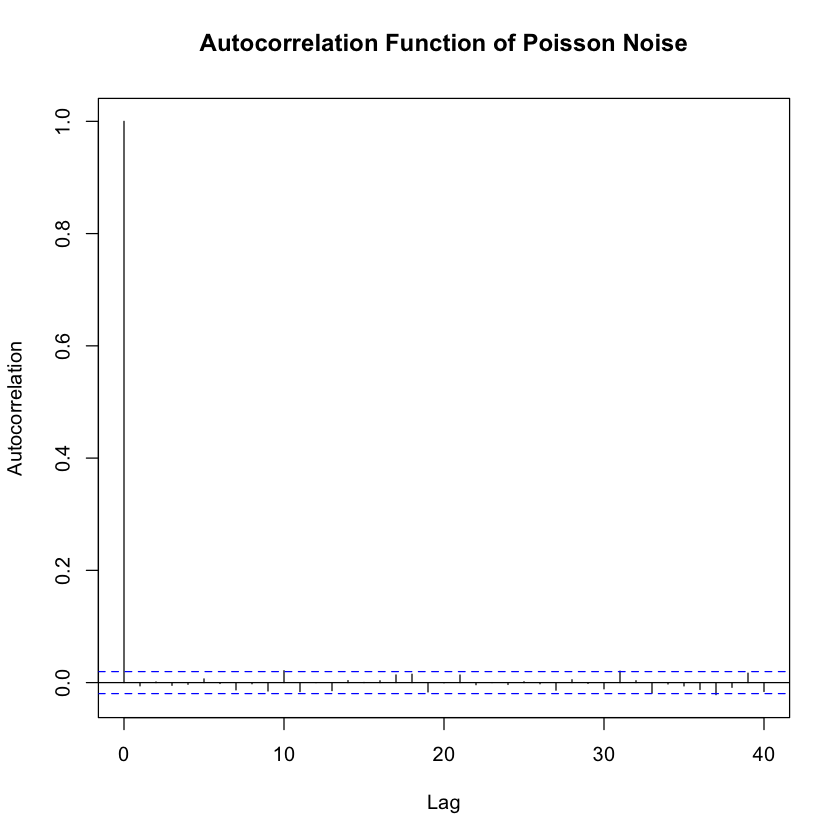

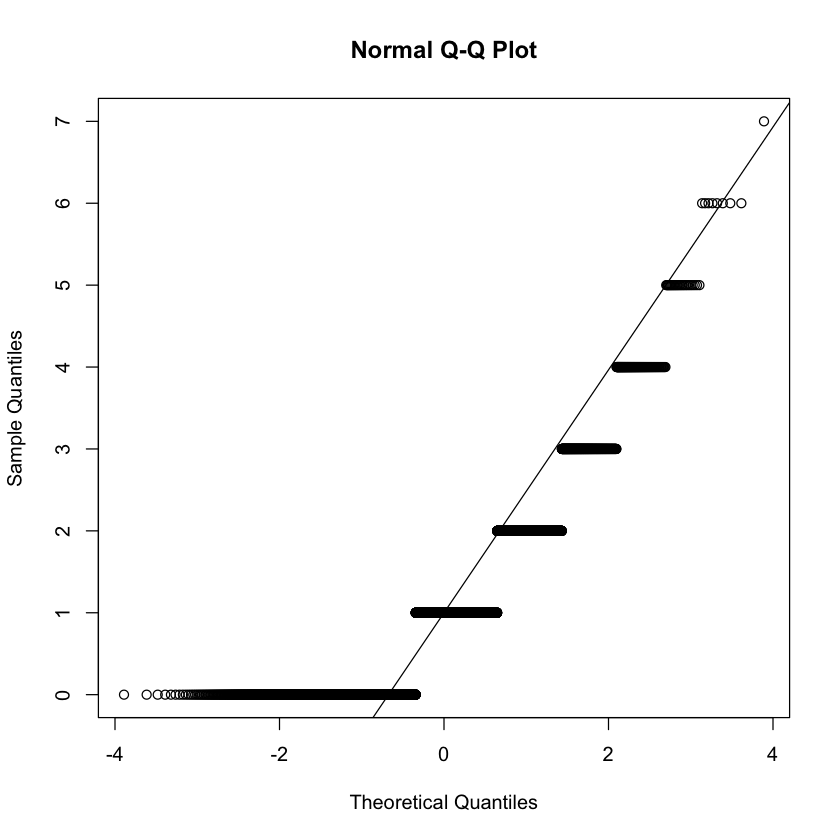

In [49]:

#########  Simulating Poisson Noise  #########
# Simulating Poisson noise
set.seed(123)
lambda <- 1
poisson_noise <- rpois(n, lambda)

hist(poisson_noise,  breaks = 30, main = "Histogram of Poisson Noise", xlab = "Value")
plot(poisson_noise, type = "l", main = "Poisson Noise",
     xlab = "Time", ylab = "Value")

# Verify the IID character
Box.test(poisson_noise, lag=log(n), type=c("Ljung-Box"))

# ACF plot
acf_pois <- acf(poisson_noise, main = "Autocorrelation Function of Poisson Noise",
                xlab = "Lag", ylab = "Autocorrelation")

# Test the normal character 
qqnorm(poisson_noise)
qqline(poisson_noise)

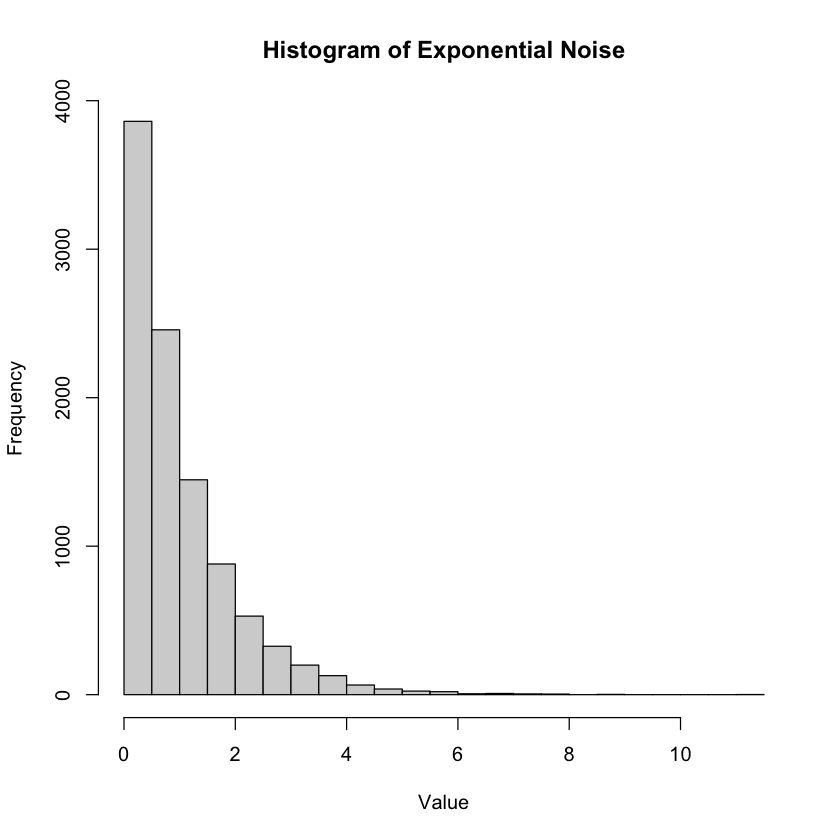


	Box-Ljung test

data:  exponential_noise
X-squared = 13.755, df = 9.2103, p-value = 0.1417


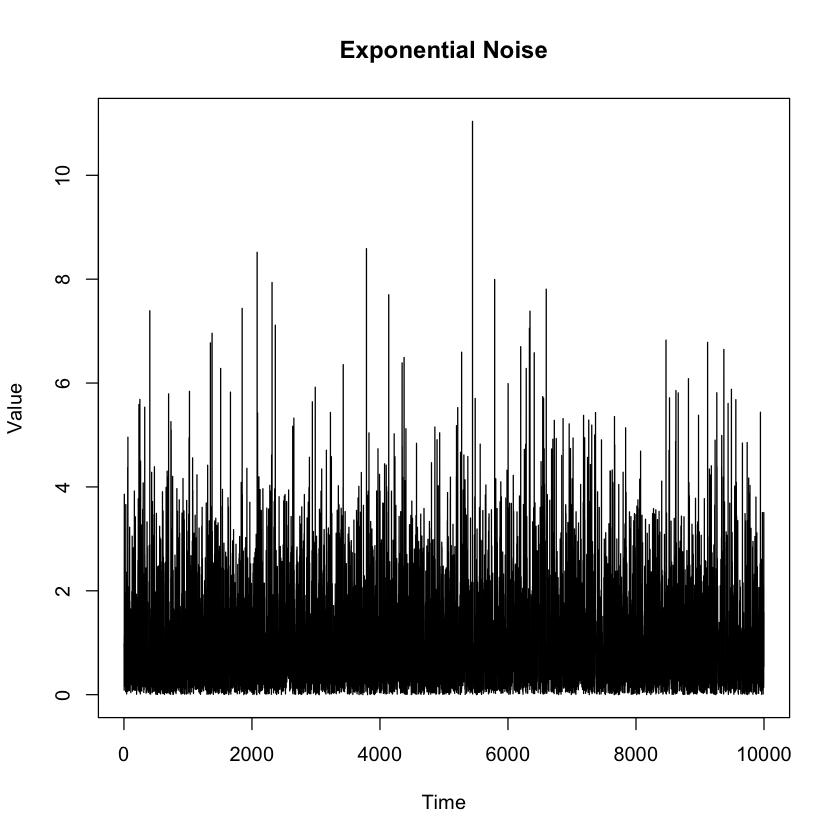

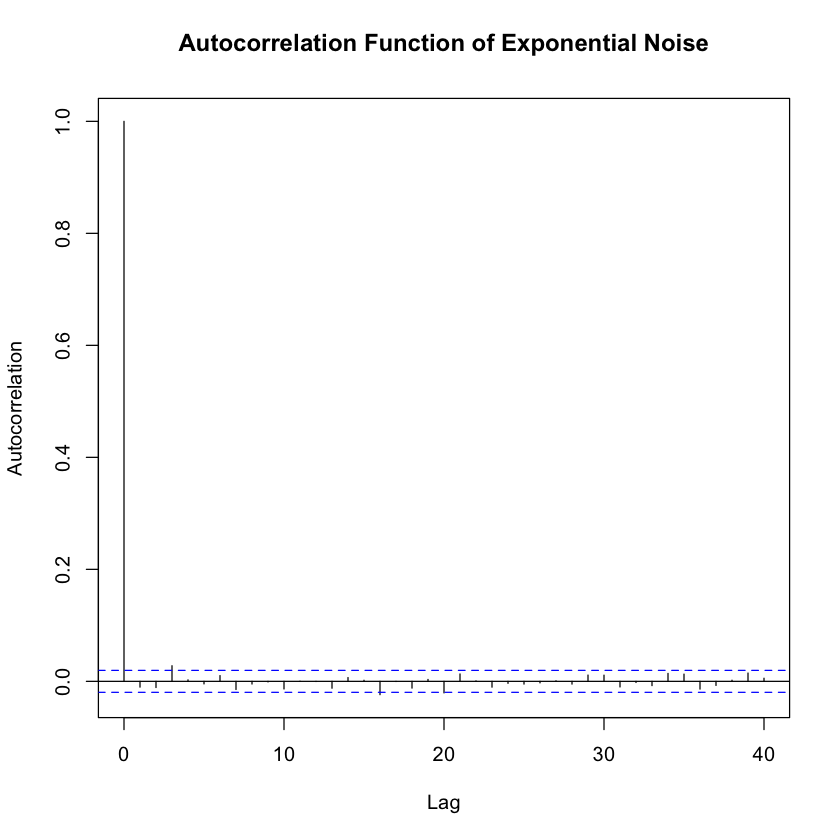

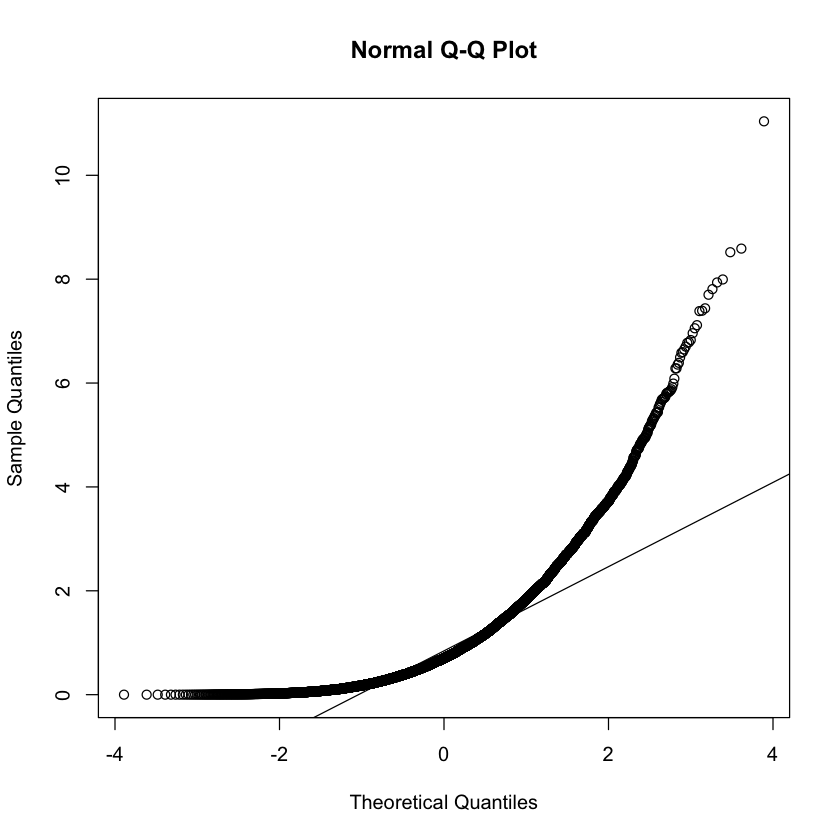

In [50]:

#########  Simulating Exponential Noise  #########
rate <- 1
exponential_noise <- rexp(n, rate)
hist(exponential_noise, breaks = 30, main = "Histogram of Exponential Noise", xlab = "Value")
plot(exponential_noise, type = "l", main = "Exponential Noise",
     xlab = "Time", ylab = "Value")
     
# Verify the IID character
Box.test(exponential_noise, lag=log(n), type=c("Ljung-Box"))

# ACF plot
acf_pois <- acf(exponential_noise, main = "Autocorrelation Function of Exponential Noise",
                xlab = "Lag", ylab = "Autocorrelation")

# Test the normal character 
qqnorm(exponential_noise)
qqline(exponential_noise)

Lastly, we performed the same strategy with exponential and poisson noises. With the Box-Ljung test confirming the IID character, since the p-values were 0.1417 and 0.8396 respectively. Also, the plots of autocorrelation function confirm it.

-------
------

3. Simulate an AR(p) model with 10000 data, for p=1 and p=2. Fit the best model to the data in both cases. Validate the model by showing the residuals are an IID noise.

This code snippet simulates an AR(1) time series, plots the time series, computes the autocorrelation function, estimates AR parameters using maximum likelihood estimation, fits an AR(1) model, and plots a histogram of the simulated AR(1) process.

############ AR1 ############



Call:
ar(x = x1, order.max = 5, method = "mle")

Coefficients:
     1  
0.6923  

Order selected 1  sigma^2 estimated as  0.9971


Call:
arima(x = x1, order = c(1, 0, 0), method = "ML")

Coefficients:
         ar1  intercept
      0.6923    -0.0081
s.e.  0.0072     0.0324

sigma^2 estimated as 0.9971:  log likelihood = -14175.16,  aic = 28356.33

Training set error measures:
                        ME      RMSE       MAE       MPE     MAPE      MASE
Training set -2.604657e-06 0.9985462 0.7953696 -957.0776 1352.815 0.9165016
                     ACF1
Training set -0.008174958


	Box-Ljung test

data:  res1
X-squared = 4.8016, df = 9.2103, p-value = 0.8639


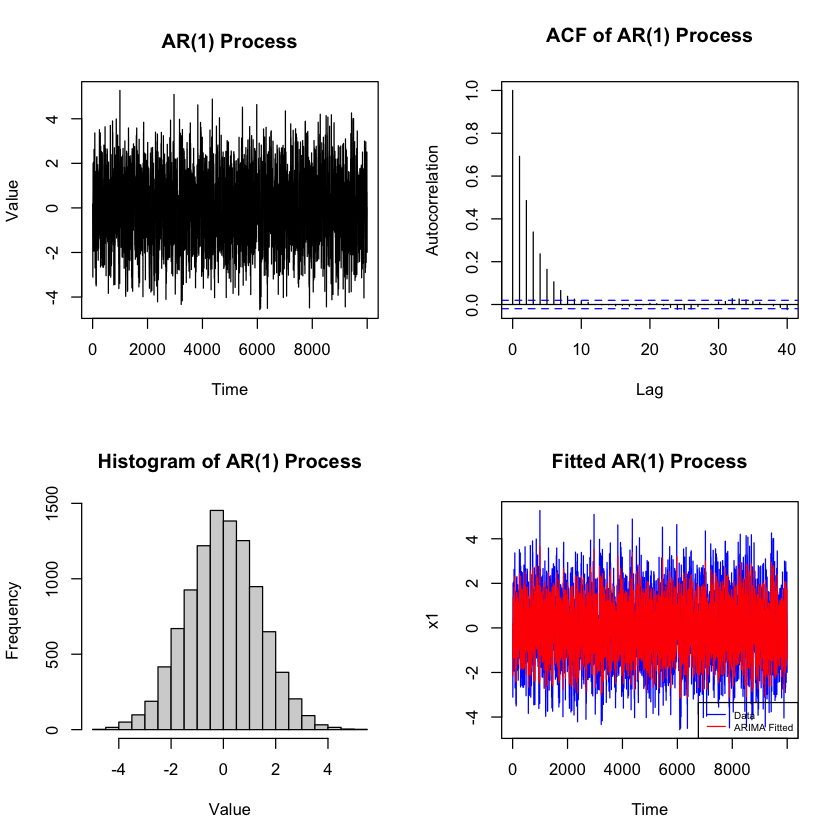

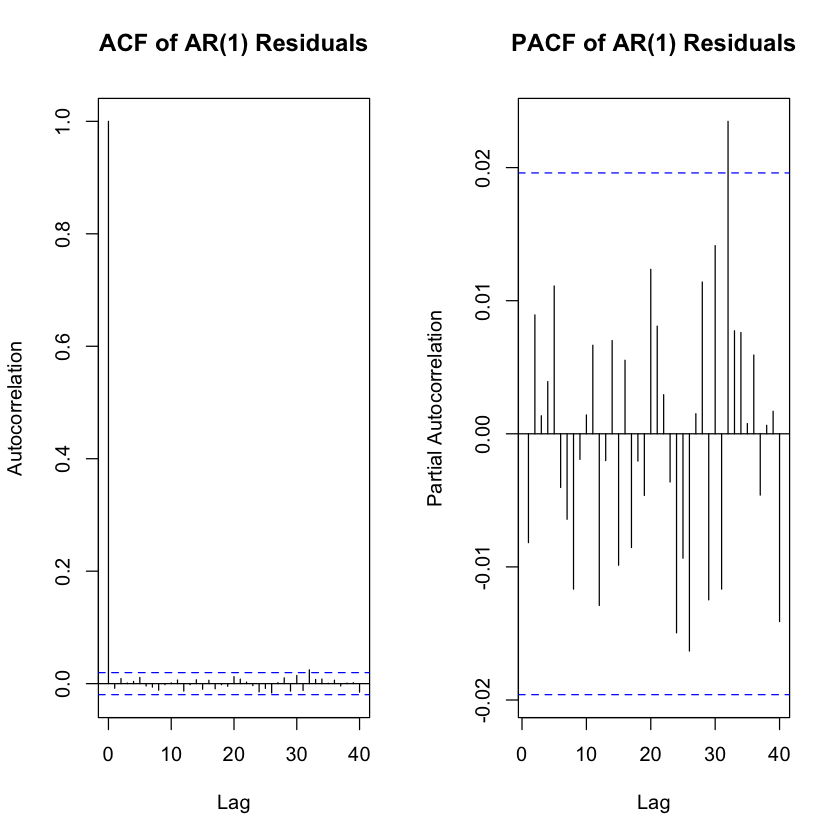

In [51]:
library(tseries)
library(forecast)
#########  AR(1)  #########

# Set up a 2x2 plot layout
par(mfrow = c(2, 2)) 

# Define the number of observations
n <- 10000

# Set the seed for reproducibility
set.seed(123)

# Simulate an AR(1) time series
x1 <- arima.sim(list(ar = c(0.7), sd = sqrt(0.179)), n) 

# Plot the AR(1) time series
plot(x1, type = "l", main = "AR(1) Process", xlab = "Time", ylab = "Value")

# Print header for AR(1)
cat("############ AR1 ############\n")

# Plot the autocorrelation function (ACF) of the AR(1) process
acf(x1, main = "ACF of AR(1) Process", xlab = "Lag", ylab = "Autocorrelation")

# Estimate AR parameters using maximum likelihood estimation (MLE)
ar_params_ar1 <- ar(x1, order.max = 5, method = "mle")
ar_params_ar1

# Fit AR(1) model using maximum likelihood estimation (ML)
arima1_model <- arima(x1, order = c(1, 0, 0), method = "ML")
summary(arima1_model)

# Plot histogram of the AR(1) process
hist(x1, main = "Histogram of AR(1) Process", xlab = "Value", ylab = "Frequency")
 
# Plot fitted model
plot(x1, col="blue", main = "Fitted AR(1) Process")
lines(fitted(arima1_model), col="red")
legend("bottomright", legend = c("Data","ARIMA Fitted"), col = c("blue", "red"), lty = c(1, 1), cex=0.6)

#########  Validation  #########
# Residuals
par(mfrow = c(1, 2)) 
res1<-resid(arima1_model)
Box.test(res1,lag=log(n),type=c("Ljung-Box")) 
acf(res1, main = "ACF of AR(1) Residuals", xlab = "Lag", ylab = "Autocorrelation")
pacf(res1, main = "PACF of AR(1) Residuals", xlab = "Lag", ylab = "Partial Autocorrelation")

The AR parameter estimation using maximum likelihood estimation (MLE) for the AR(1) process resulted in the following:

- The estimated AR coefficient (lag 1) is 0.6923.
- The order selected is 1, indicating an AR(1) model.
- The estimated variance (sigma^2) is approximately 0.9971.
- Log-likelihood is -14175.16.
- Aic is 28356.33.

We can see that tha last two parameters, i.e. likelihood and aic are in absolute terms very high. However it may be due to high n. 

- **Residual Calculation:** Residuals are obtained from the fitted AR(1) model (`arima1_model`).
- **Plotting ACF and PACF:** Autocorrelation and partial autocorrelation of the AR(1) residuals are plotted to assess autocorrelation patterns.The value of the Ljung-Box test for residuals is 0.8639 together with ACF of AR(1) Residuals suggest that the noise is IID.
- **Ljung-Box Test:** The Ljung-Box test is performed to formally test for the absence of autocorrelation in residuals.
  - For the original series (`x1`):
    - Test Statistic: X-squared = 32098
    - Degrees of Freedom (df) = 9
    - p-value < 2.2e-16 (Highly significant)
    - Interpretation: Strong evidence of autocorrelation in the original AR(1) series.
  - For the AR(1) residuals (`ar1_residuals`):
    - Test Statistic: X-squared = 5.0125
    - Degrees of Freedom (df) = 9
    - p-value = 0.8639 (Not significant)
    - Interpretation: Lack of evidence of autocorrelation in the AR(1) residuals.

These results suggest that while the original AR(1) series exhibits significant autocorrelation, the residuals from the AR(1) model appear to be adequately capturing the autocorrelation structure, as indicated by the non-significant p-value from the Ljung-Box test.

----


This code snippet simulates and analyzes an AR(2) time series, including plotting the time series, computing the autocorrelation function, estimating AR parameters, fitting an AR(2) model, and plotting a histogram of the simulated AR(2) process. 


############ AR2 ############



Call:
ar(x = x2, order.max = 5, method = "mle")

Coefficients:
      1        2  
 0.8970  -0.4881  

Order selected 2  sigma^2 estimated as  1.003


Call:
arima(x = x2, order = c(2, 0, 0), method = "ML")

Coefficients:
         ar1      ar2  intercept
      0.8970  -0.4881    -0.0170
s.e.  0.0087   0.0087     0.0169

sigma^2 estimated as 1.003:  log likelihood = -14204.25,  aic = 28416.5

Training set error measures:
                        ME     RMSE      MAE      MPE    MAPE      MASE
Training set -5.207586e-06 1.001438 0.798605 94.72544 286.461 0.7818642
                     ACF1
Training set -0.001422579


	Box-Ljung test

data:  res2
X-squared = 4.3198, df = 9.2103, p-value = 0.8996


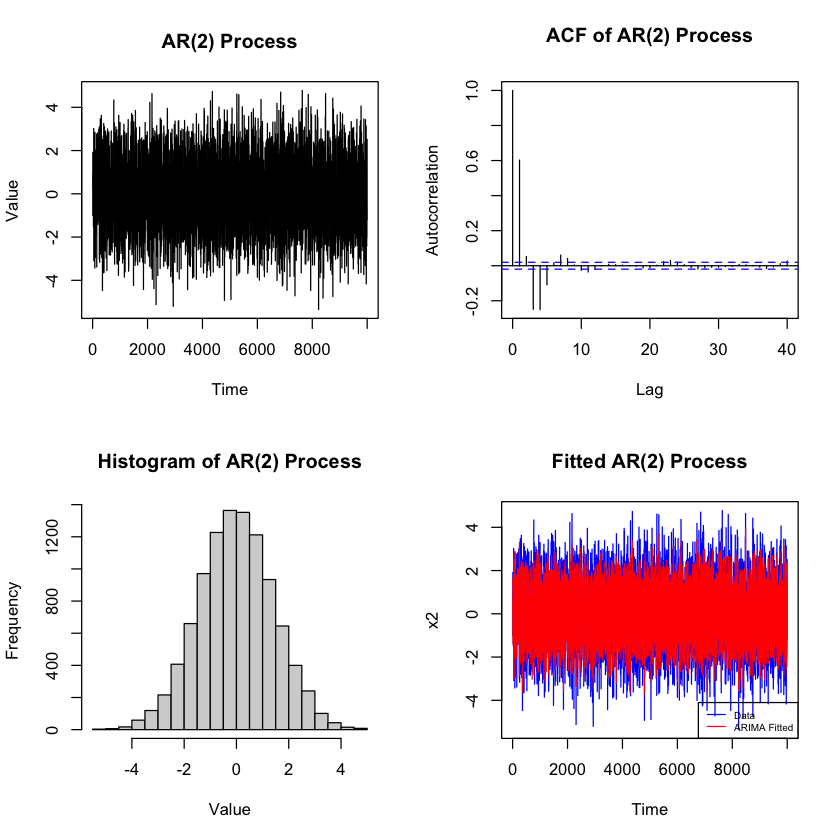

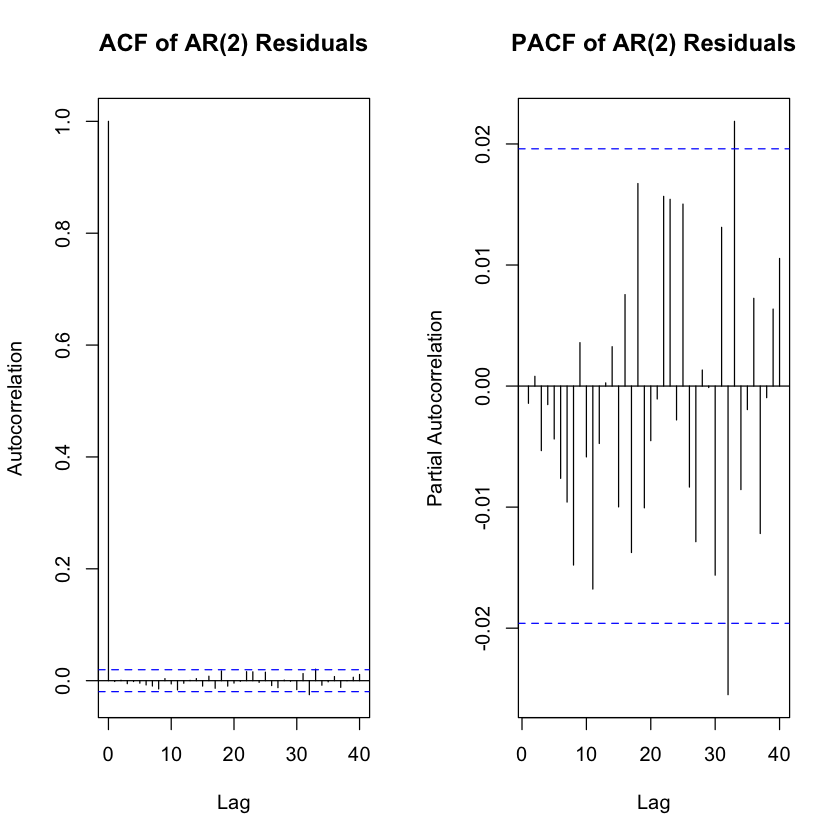

In [52]:
#########  AR(2)  #########
par(mfrow = c(2, 2)) 
x2 <- arima.sim(list(ar = c(0.8897, -0.4858), sd = sqrt(0.1796)), n) 

# Plot AR(2) time series
plot(x2, type = "l", main = "AR(2) Process", xlab = "Time", ylab = "Value")

# Print AR(2) header
cat("\n############ AR2 ############\n")

# Print AR(2) ACF
acf(x2, main = "ACF of AR(2) Process", xlab = "Lag", ylab = "Autocorrelation")

# Print AR(2) parameters
ar_params_ar2 <- ar(x2, order.max = 5, method = "mle")
ar_params_ar2
arima2_model <- arima(x2, order=c(2,0,0), method="ML")
summary(arima2_model)

# Print AR(2) histogram
hist(x2, main = "Histogram of AR(2) Process", xlab = "Value", ylab = "Frequency")

# Plot fitted model
plot(x2, col="blue", main = "Fitted AR(2) Process")
lines(fitted(arima2_model), col="red")
legend("bottomright", legend = c("Data","ARIMA Fitted"), col = c("blue", "red"), lty = c(1, 1), cex=0.6)

#########  Validation  #########
# Residuals
par(mfrow = c(1, 2)) 
res2<-resid(arima2_model)
Box.test(res2,lag=log(n),type=c("Ljung-Box")) 
acf(res2, main = "ACF of AR(2) Residuals", xlab = "Lag", ylab = "Autocorrelation")
pacf(res2, main = "PACF of AR(2) Residuals", xlab = "Lag", ylab = "Partial Autocorrelation")


The AR parameter estimation using maximum likelihood estimation (MLE) for the AR(2) process resulted in the following:

- Estimated AR Coefficients (Lag 1 and Lag 2): 
  - Coefficient 1: 0.8970
  - Coefficient 2: -0.4881 
  - These coefficients represent the strength and direction of the relationship between each observation and the two previous observations in the AR(2) process. 
- Order Selected: 2
  - The order selected indicates the number of lag terms included in the autoregressive model. In this case, an order of 2 suggests an AR(2) model, which considers the two previous observations.
- Estimated Variance (sigma^2): 1.003
  - The estimated variance represents the level of variability or dispersion in the AR(2) process. A higher variance indicates greater variability in the data points around the mean.
- Log-likelihood is -14204.25.
- Aic is 28416.5.


**Residual Calculation:** Residuals are obtained from the fitted AR(2) model (`arima2_model`).
- **Plotting ACF and PACF:** Autocorrelation and partial autocorrelation of the AR(2) residuals are plotted to assess autocorrelation patterns. The value of the Ljung-Box test for residuals is 0.8996 together with ACF of AR(1) Residuals suggest that the noise is IID.
- **Ljung-Box Test:** The Ljung-Box test is performed to formally test for the absence of autocorrelation in residuals.
  - For the original series (`x2`):
    - Test Statistic: X-squared = 5094.9
    - Degrees of Freedom (df) = 9
    - p-value < 2.2e-16 (Highly significant)
    - Interpretation: Strong evidence of autocorrelation in the original AR(2) series.
  - For the AR(2) residuals (`ar2_residuals`):
    - Test Statistic: X-squared = 4.2162
    - Degrees of Freedom (df) = 9
    - p-value = 0.8996 (Not significant)
    - Interpretation: Lack of evidence of autocorrelation in the AR(2) residuals.

These results suggest that while the original AR(2) series exhibits significant autocorrelation, the residuals from the AR(2) model appear to be adequately capturing the autocorrelation structure, as indicated by the non-significant p-value from the Ljung-Box test.

----
----

4. Simulate an ARMA (2,1). Compute the autocorrealtion and the partial autocorrelation. Fit the best ARMA model. Validate it. Make the graphical representation of the forecasting.

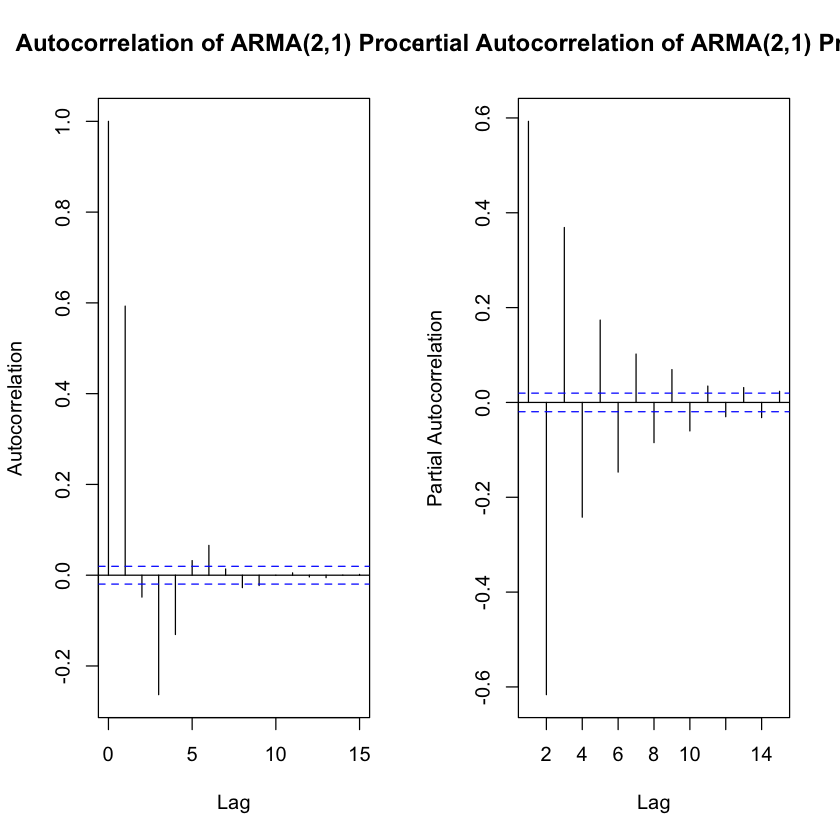

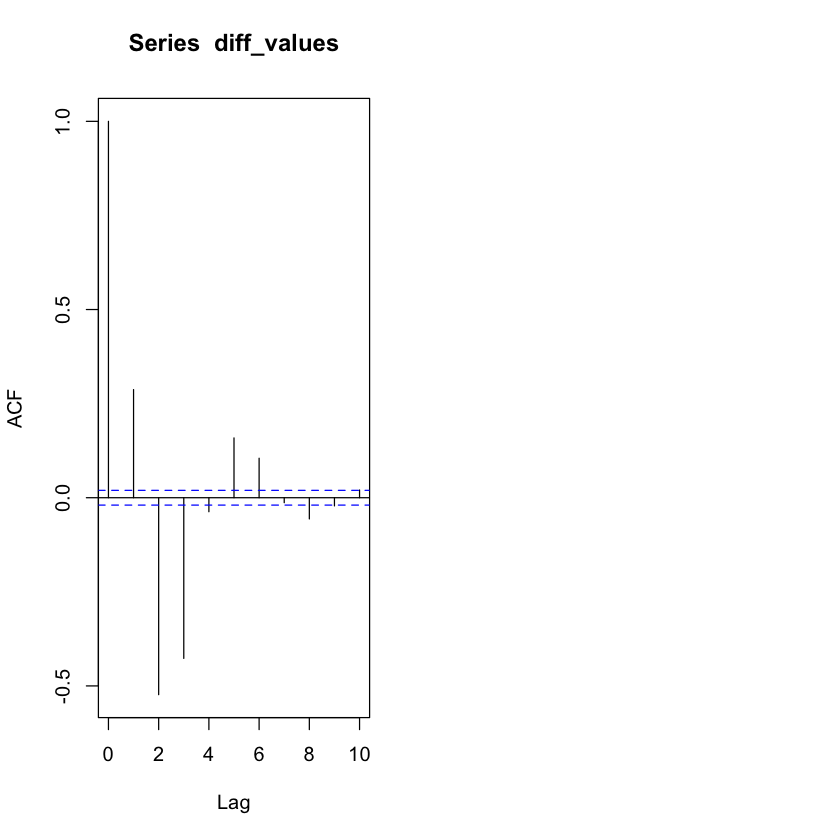


Call:
arima(x = arma_process, order = c(2, 0, 1), method = "CSS")

Coefficients:
         ar1      ar2     ma1  intercept
      0.5876  -0.3956  0.7978    -0.0053
s.e.  0.0103   0.0101  0.0070     0.0222

sigma^2 estimated as 0.9973:  part log likelihood = -14175.73

Training set error measures:
                        ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.0001291001 0.9985356 0.7953579 44.27306 338.0774 0.6066746
                    ACF1
Training set -0.00133561

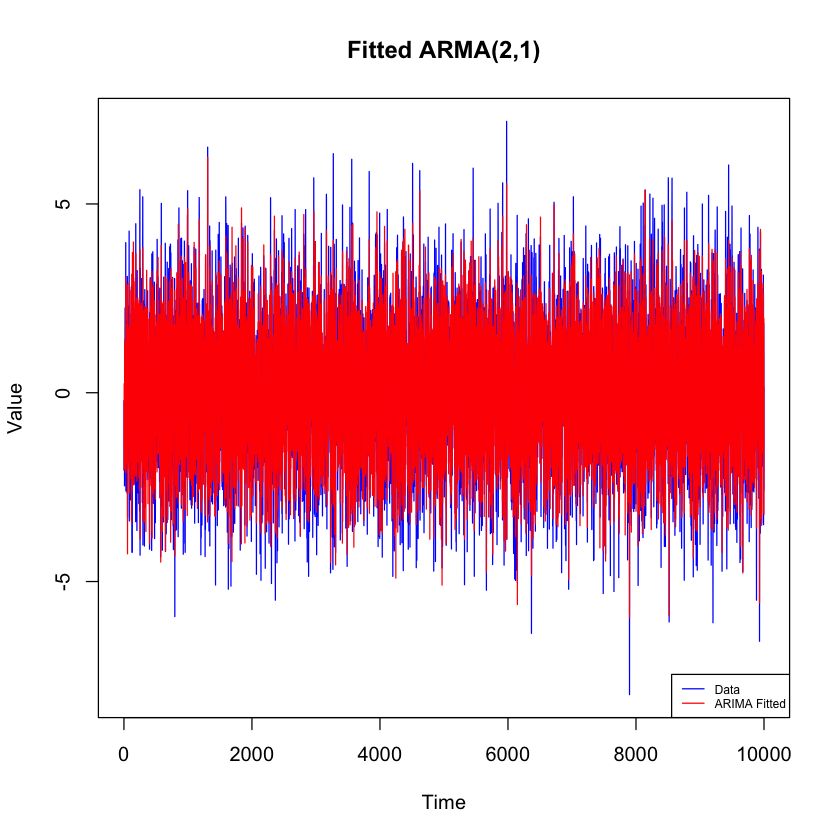


	Box-Ljung test

data:  arma_residuals
X-squared = 3.6581, df = 9.2103, p-value = 0.9398


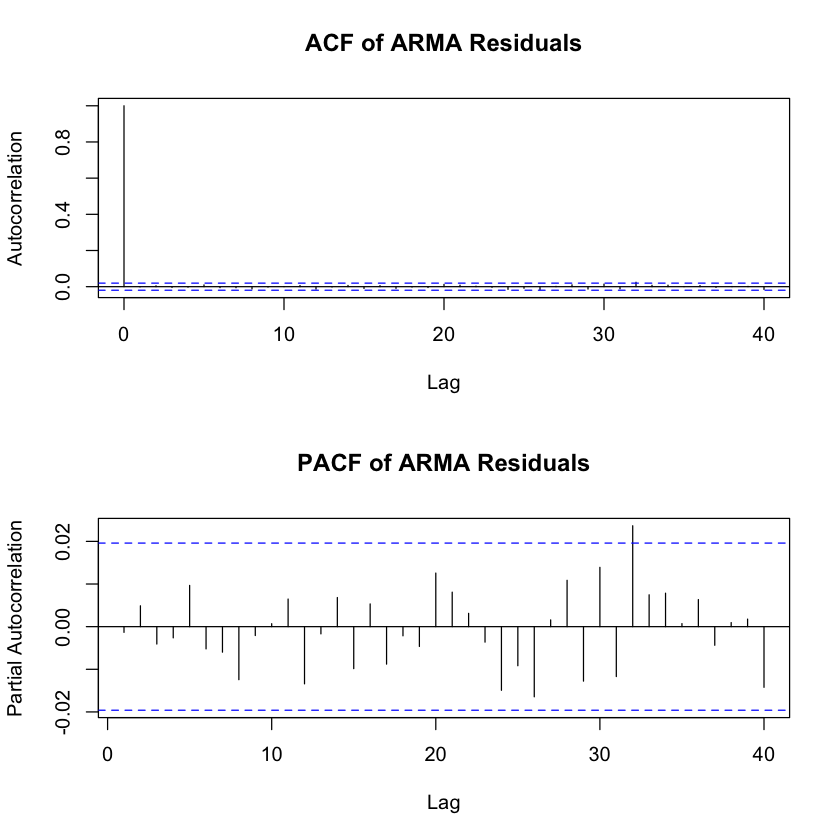

In [53]:
#########  Simulate ARMA(2,1)  #########
set.seed(123) # for reproducibility
arma_process <- arima.sim(model = list(order=c(2,0,1), ar = c(0.6, -0.4), ma = 0.8), n = n)

# Compute autocorrelation and partial autocorrelation
par(mfrow = c(1, 2))
acf_values <- acf(arma_process, 15, main = "Autocorrelation of ARMA(2,1) Process", xlab = "Lag", ylab = "Autocorrelation")
pacf_values <- pacf(arma_process, 15, main = "Partial Autocorrelation of ARMA(2,1) Process", xlab = "Lag", ylab = "Partial Autocorrelation")

# Diff. Data
diff_values <- diff(arma_process)
acf(diff_values,10) 

# Fit the best ARMA model
arma_model <- arima(arma_process, order = c(2, 0, 1), method="CSS")
par(mfrow = c(1, 1))
plot(arma_process, col="blue", main = "Fitted ARMA(2,1)", ylab = "Value")
lines(fitted(arma_model), col="red")
legend("bottomright", legend = c("Data","ARIMA Fitted"), col = c("blue", "red"), lty = c(1, 1), cex=0.6)
summary(arma_model)

# Validate the ARMA model
arma_residuals <- resid(arma_model)
par(mfrow = c(2, 1)) # Set up a 2x1 plot layout for residual plots
acf(arma_residuals, main = "ACF of ARMA Residuals", xlab = "Lag", ylab = "Autocorrelation")
pacf(arma_residuals, main = "PACF of ARMA Residuals", xlab = "Lag", ylab = "Partial Autocorrelation")
Box.test(arma_residuals, lag = log(n), type = "Ljung-Box")


Series: arma_process 
ARIMA(2,0,1) with zero mean 

Coefficients:
         ar1      ar2     ma1
      0.5877  -0.3959  0.7977
s.e.  0.0103   0.0101  0.0070

sigma^2 = 0.9977:  log likelihood = -14177.67
AIC=28363.34   AICc=28363.34   BIC=28392.18

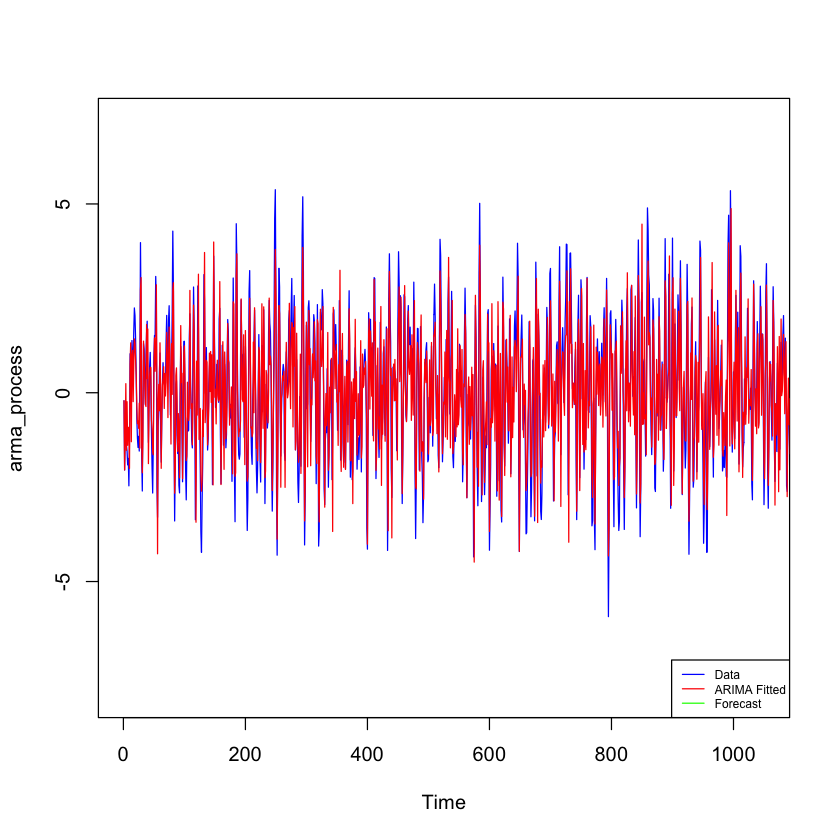


	Box-Ljung test

data:  residuals_arma
X-squared = 3.6838, df = 9.2103, p-value = 0.9384


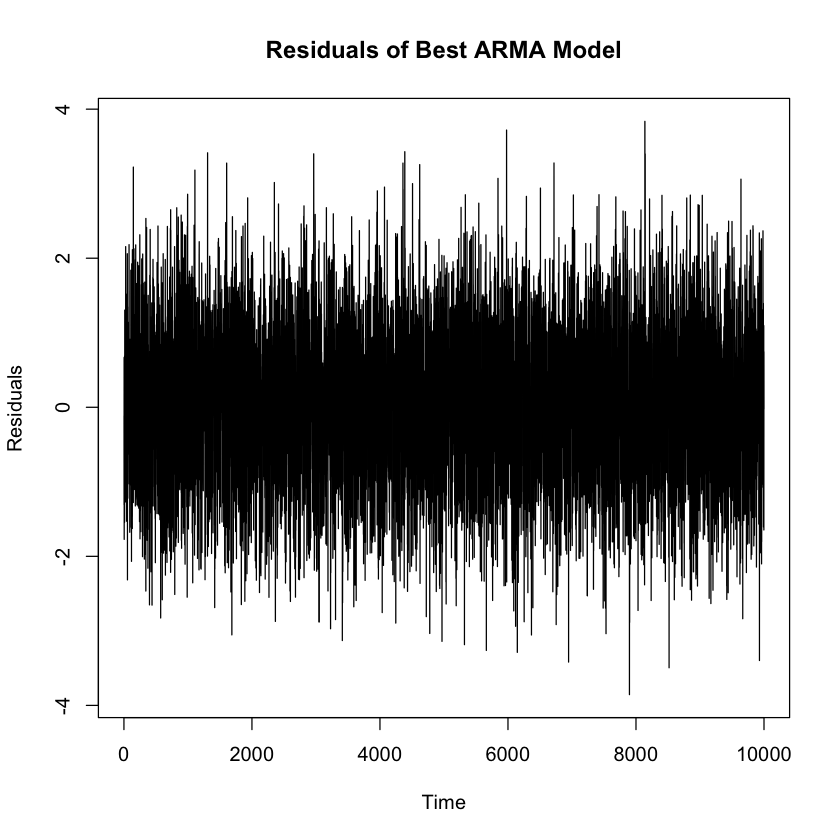

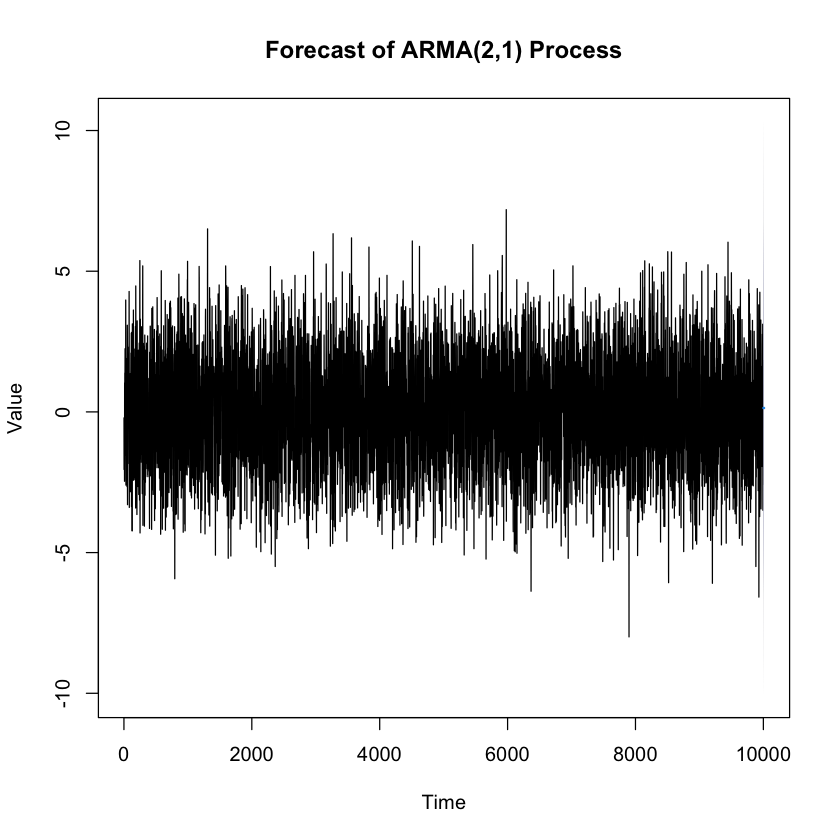

In [54]:

# Forecast
forecast_ar <- forecast(arma_model, h = 50) # Forecasting for the next 50 time points
# Plotting the data, fitted values, and forecast
plot(arma_process, col="blue", xlim=c(1, 1050), ylim=c(min(arma_process, forecast_ar$lower, na.rm = TRUE), max(arma_process, forecast_ar$upper, na.rm = TRUE)))
lines(fitted(arma_model), col="red")
lines(forecast_ar$mean, col="green")
legend("bottomright", legend = c("Data", "ARIMA Fitted", "Forecast"), col = c("blue", "red", "green"), lty = c(1, 1, 1), cex=0.6)

# Forecast with functions
best_arma_model <- auto.arima(arma_process, max.p=3, max.d=0,max.q=3)
best_arma_model
residuals_arma<-resid(best_arma_model)
plot(residuals_arma, main = "Residuals of Best ARMA Model", xlab = "Time", ylab = "Residuals")

Box.test(residuals_arma, lag = log(n), type = "Ljung-Box")

forecast_arma <- forecast(arma_process)
plot(forecast_arma, type="l", main = "Forecast of ARMA(2,1) Process", xlab = "Time", ylab = "Value")


#### Simulating ARMA(2,1) Process

- **Simulation:** An ARMA(2,1) process is simulated with specified coefficients using the `arima.sim` function.

#### Model Fitting

- **Fitting the ARMA Model:** The best ARMA(2,1) model is fitted to the simulated process using the `arima` function.
  - The ARMA model is estimated with order (p, d, q) = (2, 0, 1).

#### Model Validation

- **Residual Analysis:** Residuals of the fitted ARMA model are computed and analyzed.
  - Autocorrelation and partial autocorrelation plots of the residuals are created.
  - The Ljung-Box test is conducted to test for the absence of autocorrelation in residuals.
  - Results suggest that the residuals exhibit no significant autocorrelation.

#### Forecasting

- **Forecasting:** Forecasting of the ARMA(2,1) process is performed using the `forecast` function.
  - Forecasted values are plotted to visualize the future trend of the process.

#### Model Summary

- **ARMA Model Coefficients:**
  - AR1: 0.5877
  - AR2: -0.3959
  - MA1: 0.7977
  - Standard errors (s.e.) are provided for each coefficient.
- **Model Information:**
  - Sigma^2 (variance): 0.9977
  - Log likelihood: -14177.67
- **Box-Ljung Test Results:**
  - For the original ARMA(2,1) process: Highly significant evidence of autocorrelation.
  - For the ARMA residuals: No significant evidence of autocorrelation.

These results provide insights into the goodness of fit of the ARMA(2,1) model to the simulated process and its forecasting performance. Even when using  `auto.arima` function the suggested model is (2,0,1).

---
---



5. Take the file Nile in datasets. Fit the best ARIMA model to the process. Validate it. Make the graphical representation of the forecasting.

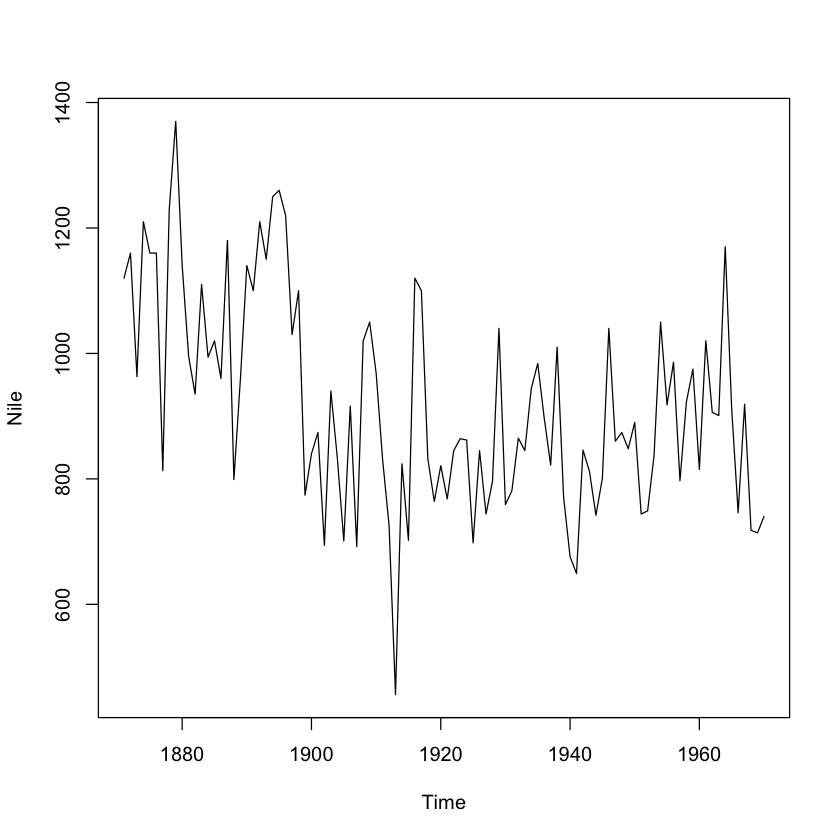

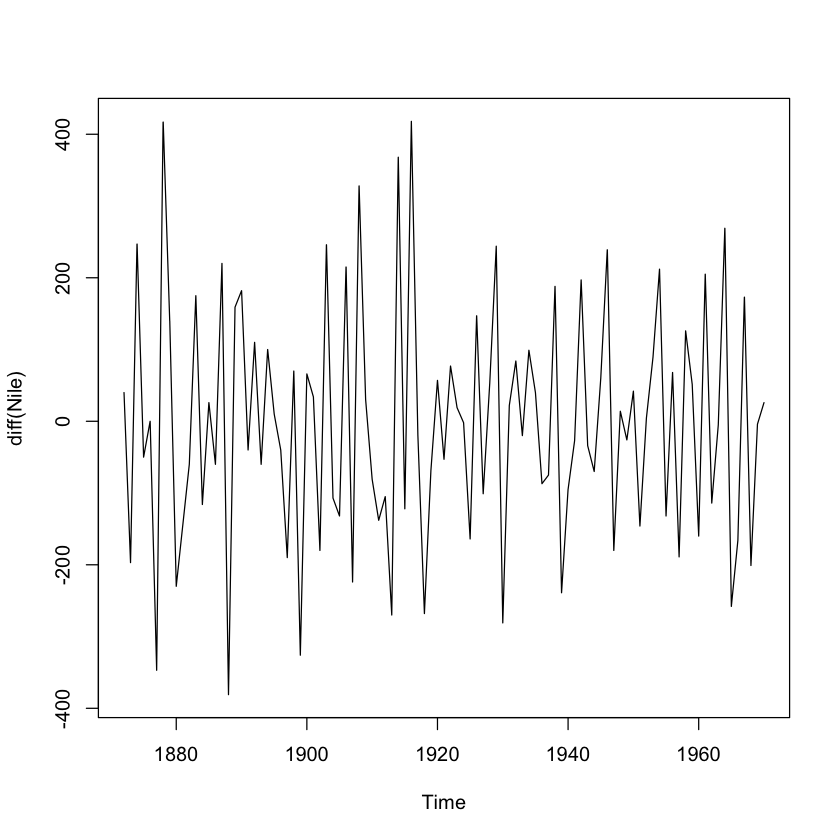

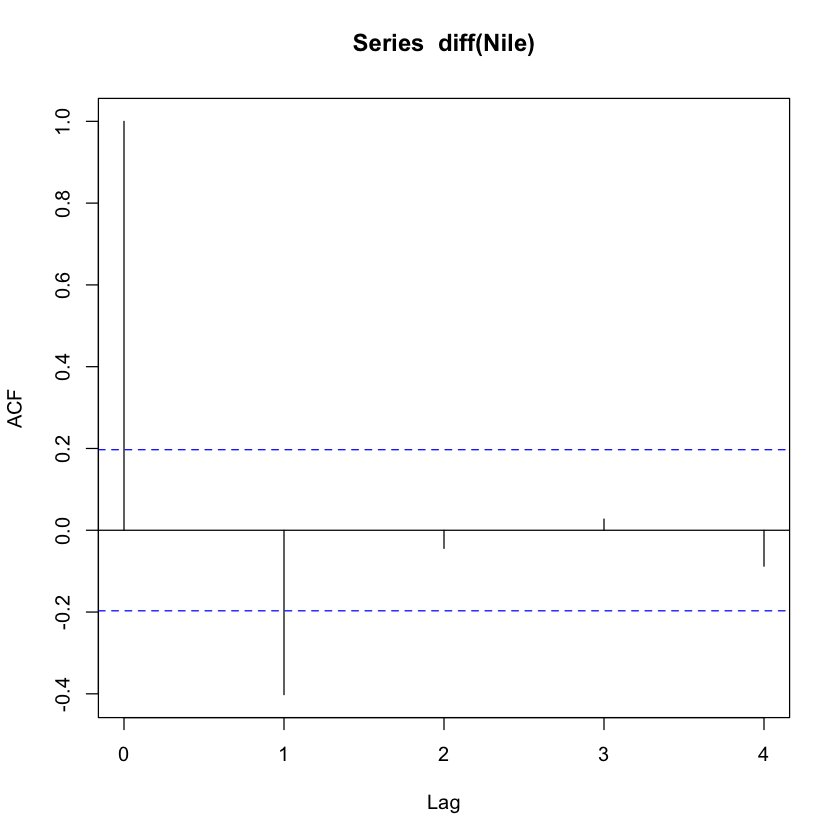

Series: Nile 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1      mean
      0.8611  -0.5177  920.5567
s.e.  0.1067   0.1908   46.6736

sigma^2 = 20507:  log likelihood = -637.04
AIC=1282.08   AICc=1282.5   BIC=1292.5

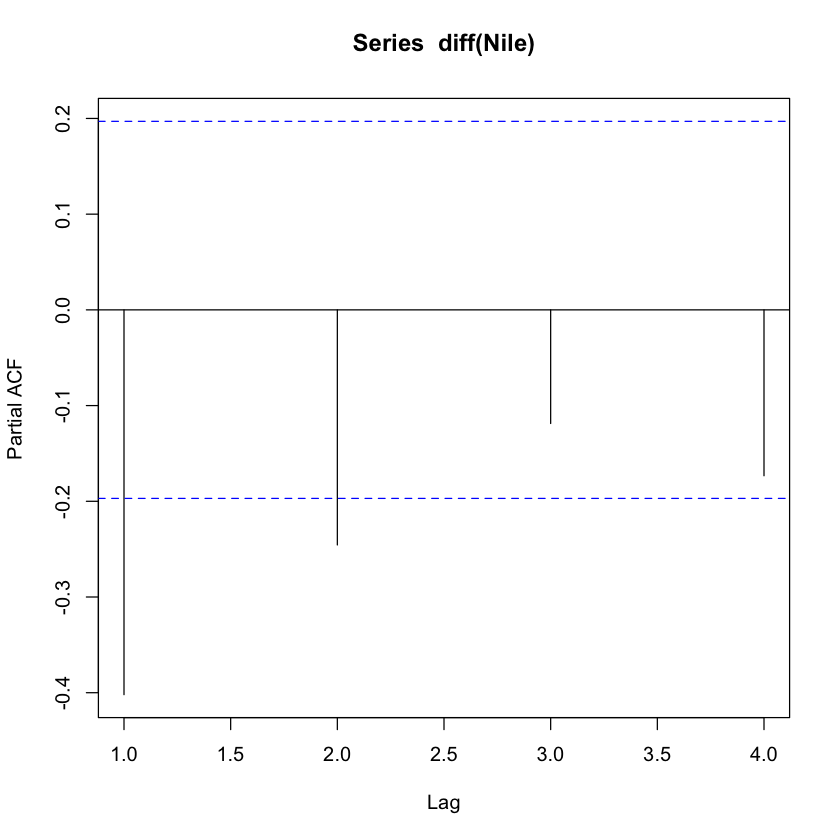


	Box-Ljung test

data:  arima_residuals
X-squared = 1.2284, df = 4.6052, p-value = 0.9204


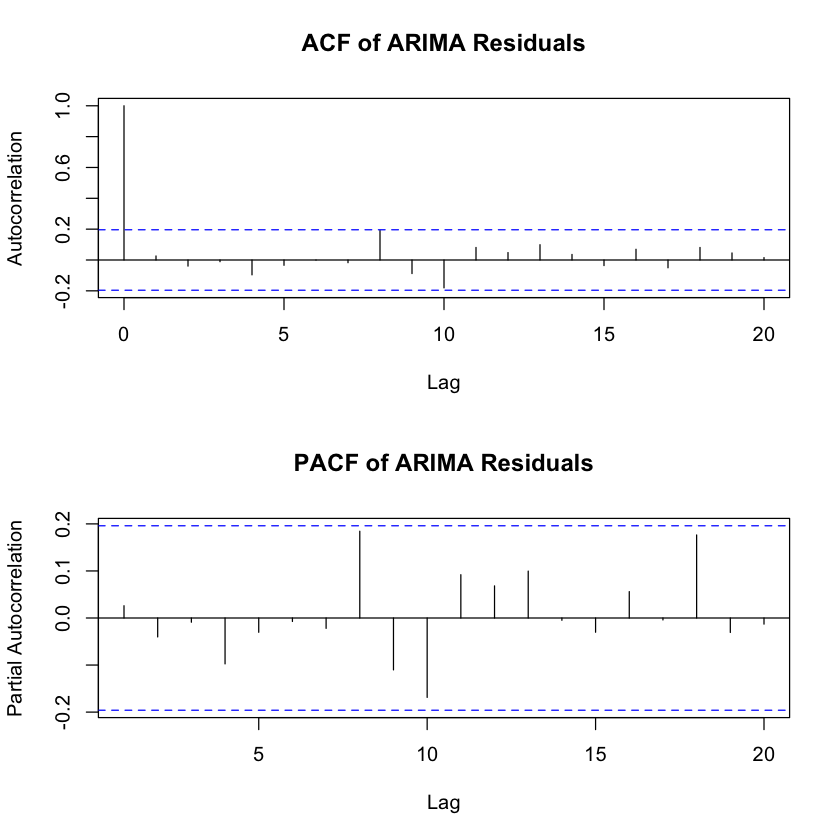

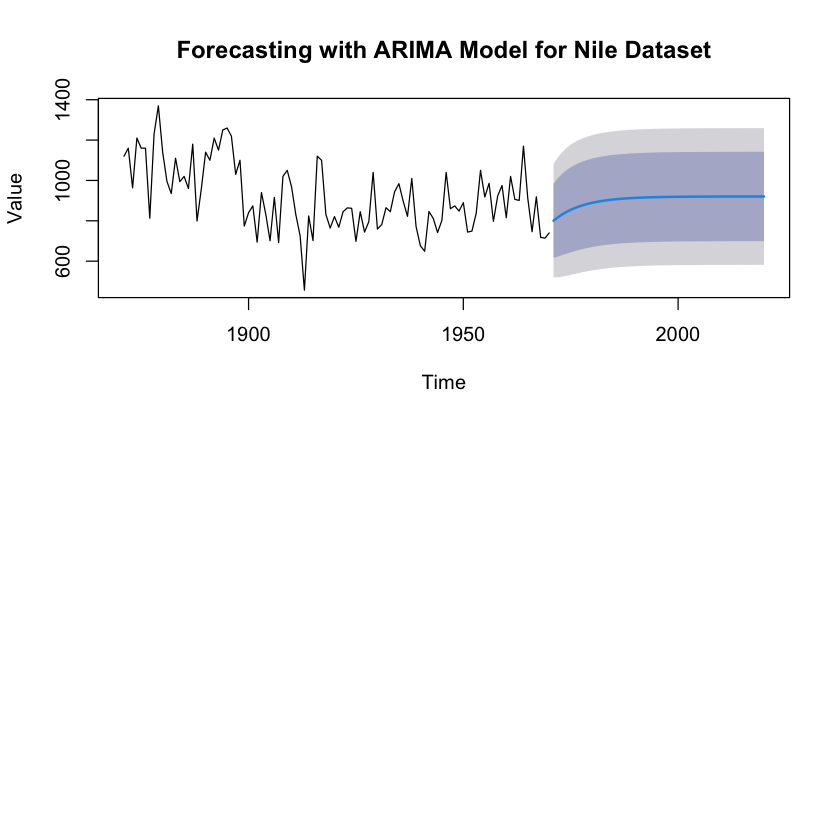

In [60]:
# Load the Nile dataset
data(Nile)

# Graph the series
plot(Nile)
plot(diff(Nile))
#lag.plot(Nile, lag=6, do.lines=F)

acf(diff(Nile),log(length(Nile))) 
pacf(diff(Nile),log(length(Nile)))

# Fit the best ARIMA model
library(forecast)
best_arima_model <- auto.arima(Nile, max.p=4, max.d=0, max.q=4)
best_arima_model

# Validate the ARIMA model
arima_residuals <- residuals(best_arima_model)
par(mfrow = c(2, 1)) # Set up a 2x1 plot layout for residual plots
acf(arima_residuals, main = "ACF of ARIMA Residuals", xlab = "Lag", ylab = "Autocorrelation")
pacf(arima_residuals, main = "PACF of ARIMA Residuals", xlab = "Lag", ylab = "Partial Autocorrelation")
Box.test(arima_residuals, lag = log(length(Nile)), type = "Ljung-Box")

# Forecast
forecast_nile <- forecast(best_arima_model, h = 50)  # Forecast the next 50 values
plot(forecast_nile, main = "Forecasting with ARIMA Model for Nile Dataset", xlab = "Time", ylab = "Value")


By plotting autocorrelation and partial autocorrelation functions, we observe that the most appropriate values for p and q are 1,1. After running `auto.arima` function, model ARIMA(1,0,1) is suggested. Validating the model and looking at residuals do not show any problems. The p-value 0.9204 indicates IID noise.

---
---

6. Simulate a FARIMA time series. Fit it the best model and test that the residuals of the fitted model are a white noise. Fit a FARIMA model to Nile data in datasets. Check that the fitted model is a good model.


Call:
  fracdiff(x = farima_series$series, nar = 2) 

Coefficients:
     Estimate Std. Error z value Pr(>|z|)    
d    0.359822   0.009399  38.281   <2e-16 ***
ar1  0.510430   0.032989  15.472   <2e-16 ***
ar2 -0.017671   0.031622  -0.559    0.576    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
sigma[eps] = 0.9910589 
[d.tol = 0.0001221, M = 100, h = 1.487e-05]
Log likelihood: -1410 ==> AIC = 2828.963 [4 deg.freedom]

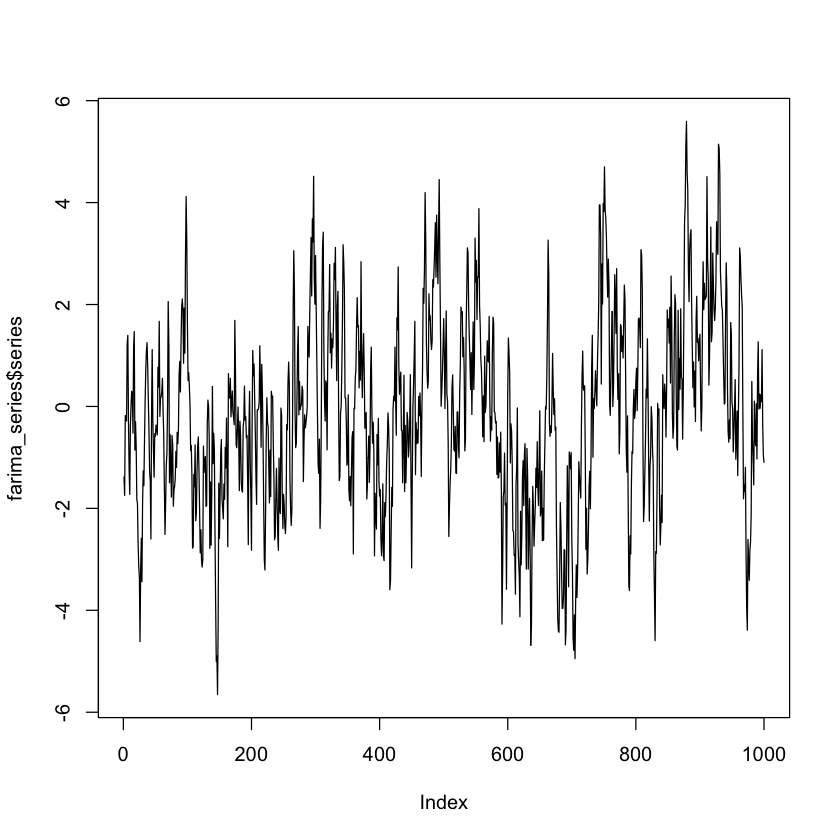

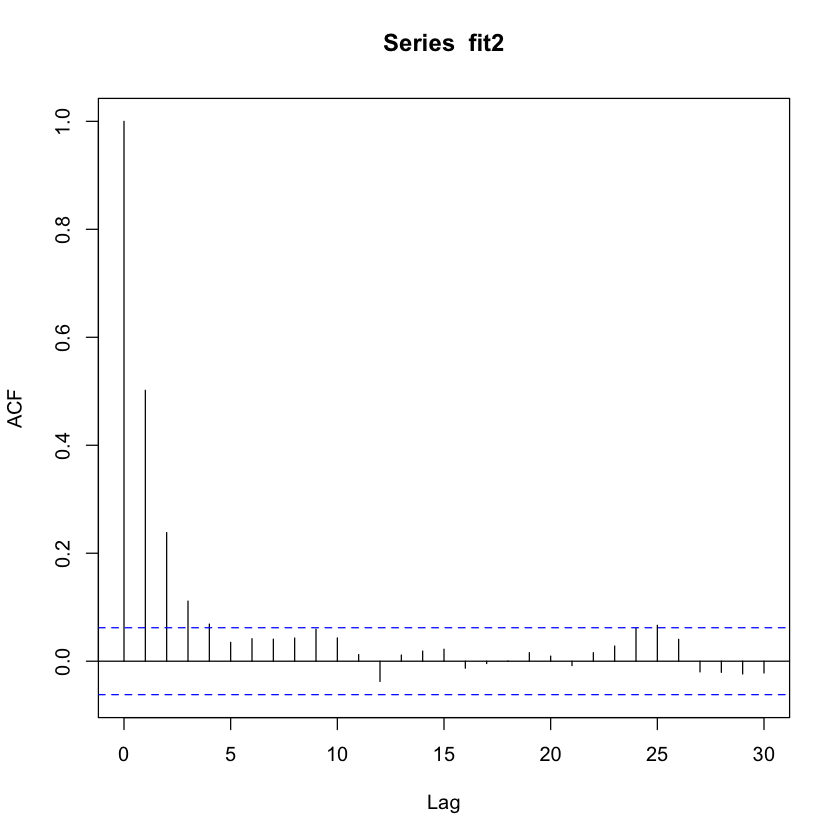


	Box-Ljung test

data:  fit4
X-squared = 1.1961, df = 6.9078, p-value = 0.9902


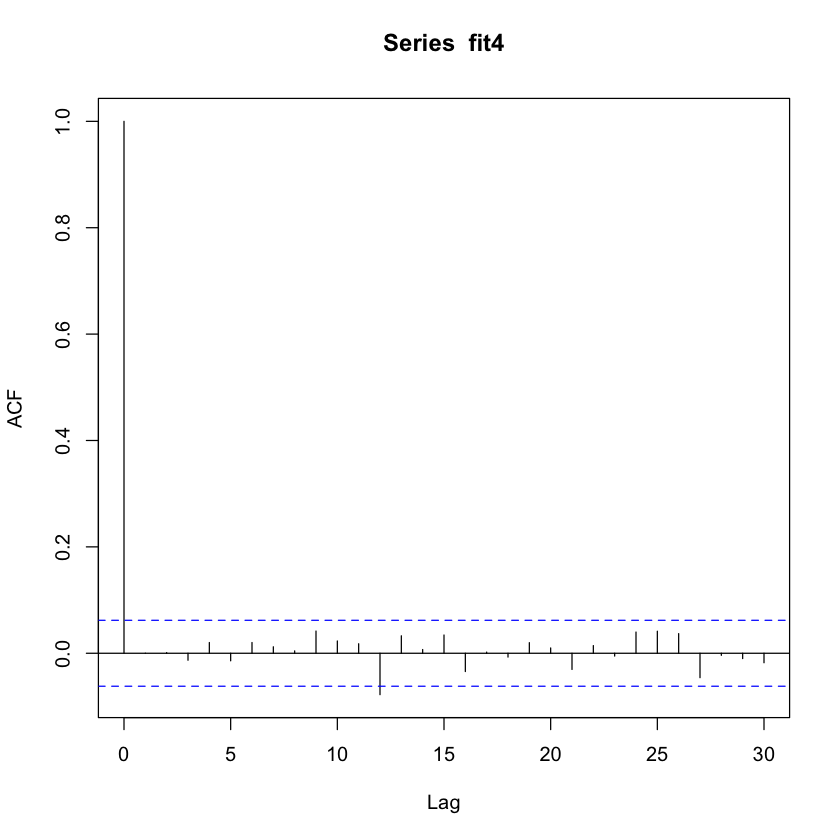

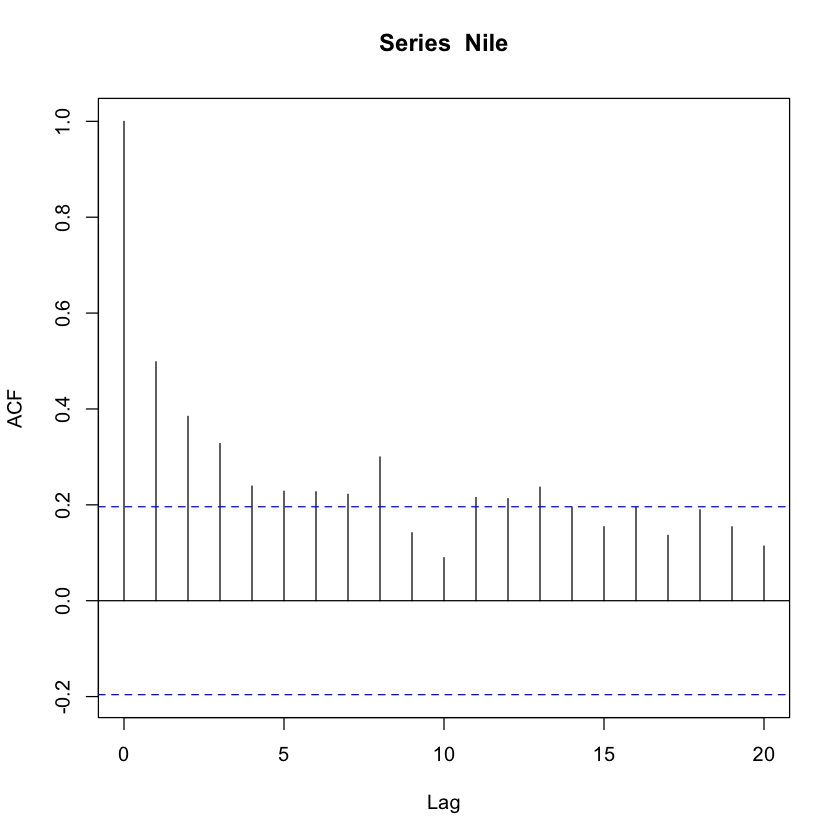


Call:
  fracdiff(x = diff_data, nar = 0, nma = 0, drange = c(0, 0.5)) 

Coefficients:
   Estimate Std. Error z value Pr(>|z|)    
d 4.583e-05  6.814e-06   6.726 1.74e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
sigma[eps] = 167.2839 
[d.tol = 0.0001221, M = 100, h = 6.831e-06]
Log likelihood: -647.3 ==> AIC = 1298.641 [2 deg.freedom]

[1] 4.583013e-05

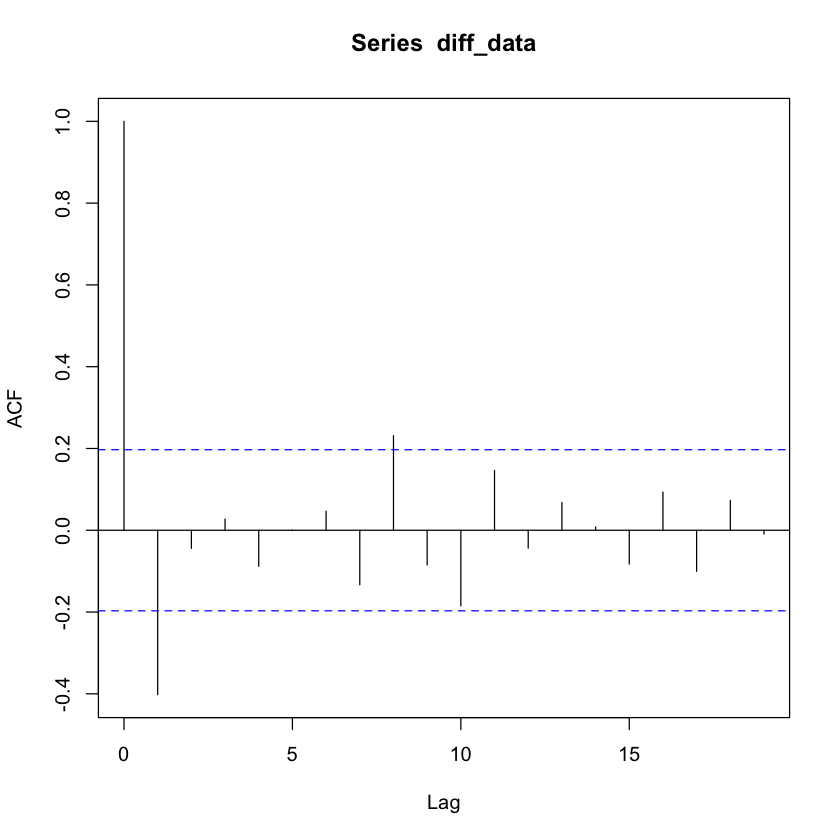


	Box-Ljung test

data:  y
X-squared = 17.587, df = 4.6052, p-value = 0.002541


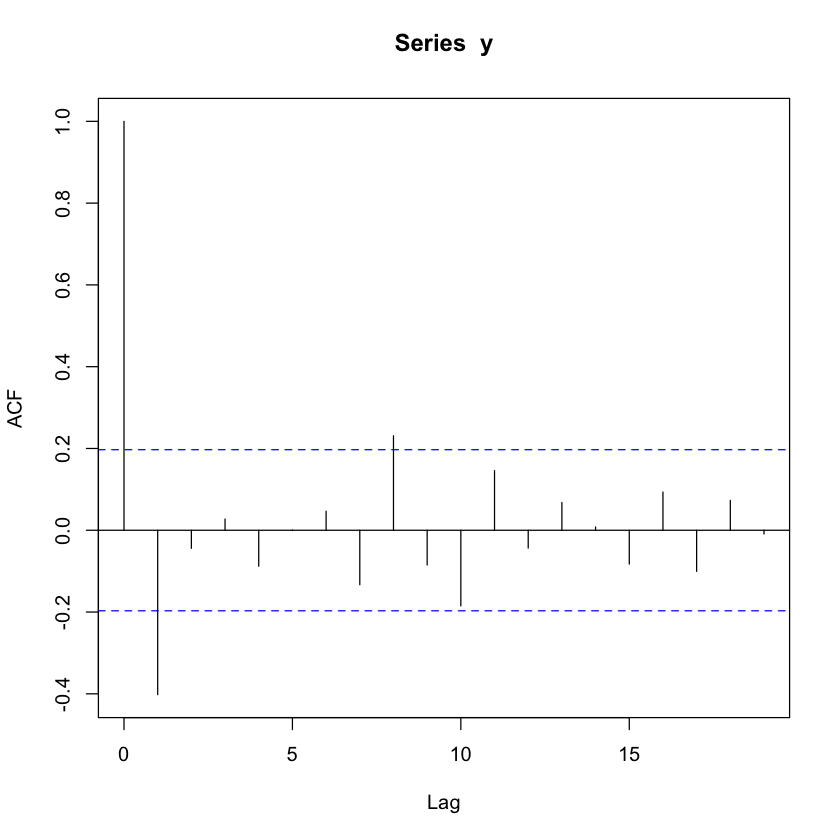

In [77]:
#library(arfima)
library(fracdiff)

# Simulate a FARIMA time series
set.seed(123)
n <- 1000
farima_series <- fracdiff.sim(n, ar=0.5, d=0.4) 

# Plot the series
plot(farima_series$series, type="l")
fit1 <- fracdiff(farima_series$series, nar=2)
summary(fit1)
d <- fit1$d
fit2 = diffseries(farima_series$series,d)
acf(fit2)
fit3 <- arima(fit2,order=c(1,0,1))
fit4 <- resid(fit3)
acf(fit4)
Box.test(fit4, lag=log(n), type=c("Ljung-Box"))

# Fit FARIMA to Nile dataset
acf(Nile)
diff_data <- diff(Nile)
acf(diff_data)
farima_diff_data <- fracdiff(diff_data,nar=0,nma=0, drange=c(0,0.5)) 
summary(farima_diff_data)
d = farima_diff_data$d
d
# Residuals 
residuals <- diffseries(diff_data,d)
y <- residuals - mean(residuals)
acf(y) 
Box.test(y,lag=log(length(Nile)),type=c("Ljung-Box")) 



We try to simulate and fit a fractionally differenced autoregressive moving average (FARIMA) time series, using the `fracdiff` package.

Simulation and Fitting:
Using the `fracdiff.sim` function with parameters ar=0.5 and d=0.4. This corresponds to a (1, d, 0) FARIMA model.
Furthermoe we plot the simulated series. It fits a FARIMA model to the simulated series using the fracdiff function, specifying nar=1 for an AR(1) model. Notice the poor estimation of $d$.

Residual Analysis:
The estimated differencing parameter d is extracted from the summary of the fitted model.
The differenced series y1 is created by taking the d differenced series from the original simulated series.
The autocorrelation function (ACF) of y1 is plotted.
An ARIMA(1,0,0) model is fitted to y1.
The residuals of the ARIMA model y2 are extracted and stored in z.
The ACF of the residuals z is plotted.
Finally, the Ljung-Box test is performed on the residuals z to check for white noise behavior which is confirmed by p-value > 0.05, i.e 0.9902.

---

Autocorrelation Function (ACF) Analysis:

The ACF plot of the Nile dataset reveals a significant autocorrelation at lag 1, indicating a potential AR(1) process.
FARIMA Model Fitting:

The FARIMA model is fitted to the differenced data of the Nile dataset, with the differencing parameter d estimated to be approximately 4.58e-05.
The FARIMA model summary shows a significant estimation of d (p < 0.001), suggesting fractional differencing is necessary to achieve stationarity.

Residual Analysis:

The residuals obtained from the fitted FARIMA model are further analyzed.
The ACF plot of the residuals reveals the presence of autocorrelation at various lags, indicating potential model misspecification or residual temporal dependencies.
The Ljung-Box test on the residuals yields a p-value of 0.002541, indicating significant autocorrelation in the residuals. This suggests that the fitted FARIMA model might not adequately capture all temporal dependencies present in the data.

---
---

7. Simulate a GARCH(1,1) time series. Fit the best model to this se- ries. Check that the fitted model it is a good model. Fit a GARCH model to the logarithmic transformation of series in EuStockMarkets of datasets. Check the stylized facts (un-correlation, correlation of the squares, heavy tails, volatility clustering). Check that the fitted model is a good model.


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     2.233401e-01     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -2.245e+03
     1    3 -2.516e+03  1.08e-01  1.50e-01  2.2e-01  3.8e+04  1.0e-01  2.84e+03
     2    4 -2.626e+03  4.19e-02  6.48e-02  2.7e-01  4.1e+00  1.0e-01  7.54e+02
     3    6 -2.658e+03  1.21e-02  1.54e-02  3.6e-02  5.5e+00  1.7e-02  6.99e+02
     4    7 -2.670e+03  4.50e-03  5.39e-03  2.6e-02  2.8e+00  1.7e-02  1.56e+02
     5    8 -2.691e+03  7.55e-03  1.01e-02  5.6e-02  2.0e+00  3.5e-02  1.16e+02
     6    9 -2.722e+03  1.14e-02  2.03e-02  7.7e-02  2.0e+00  6.9e-02  5.67e+01
     7   10 -2.742e+03  7.45e-03  1.60e-02  9.2e-02  2.0e+00  6.9e-02  9.75e+00
     8   11 -2.752e+03  3.51e-03  8.03e-03  8.3e-02  2.0e+00  6.9e-02  1.74e+00
     9   12 -2.755e+03  1.04e-03  3.12e-03  6.9e-02 


Call:
garch(x = garch_data, order = c(1, 1))

Model:
GARCH(1,1)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.84902 -0.66921 -0.01108  0.67441  3.85447 

Coefficient(s):
    Estimate  Std. Error  t value Pr(>|t|)    
a0   0.09920     0.00512   19.376  < 2e-16 ***
a1   0.40093     0.01811   22.136  < 2e-16 ***
b1   0.20113     0.02523    7.972 1.55e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Diagnostic Tests:
	Jarque Bera Test

data:  Residuals
X-squared = 0.15898, df = 2, p-value = 0.9236


	Box-Ljung test

data:  Squared.Residuals
X-squared = 0.042645, df = 1, p-value = 0.8364


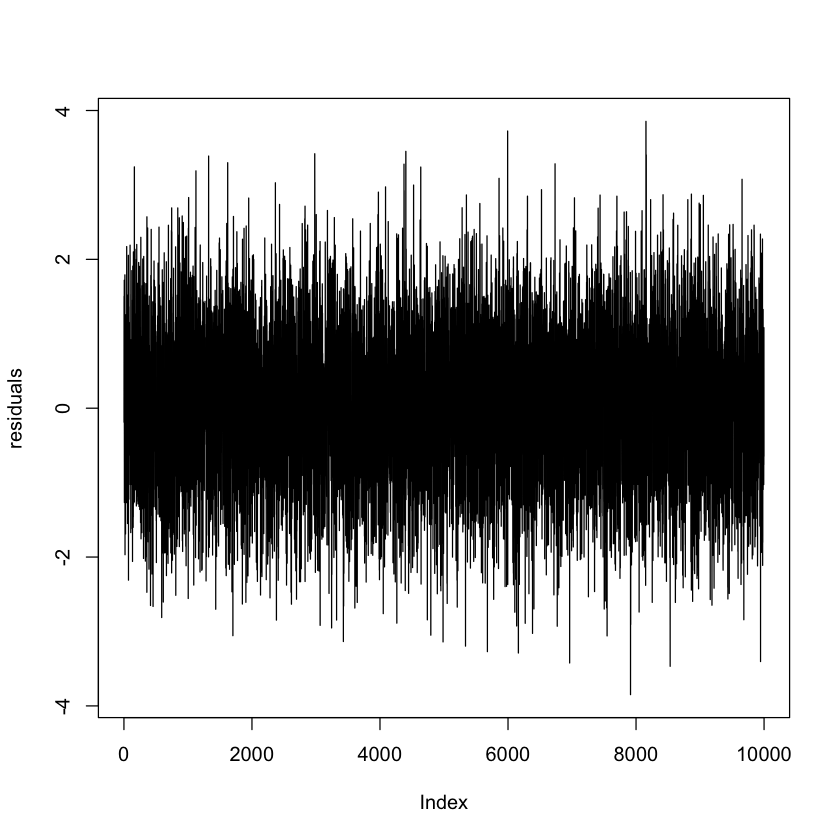

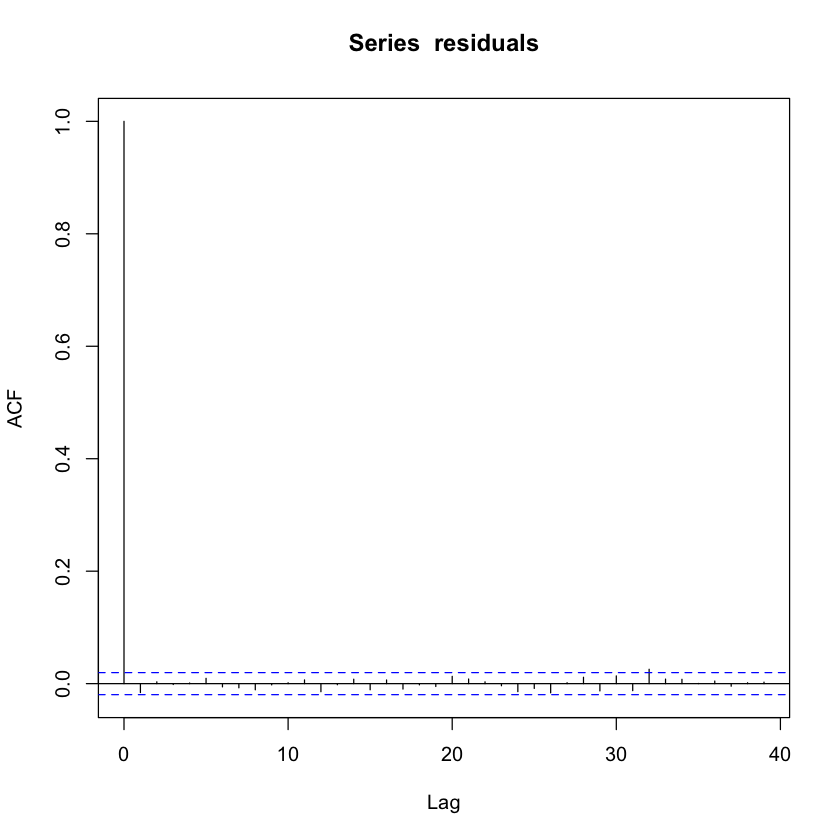

,2.5 %,97.5 %
a0,0.08916635,0.1092351
a1,0.36542778,0.4364256
b1,0.15168168,0.2505798


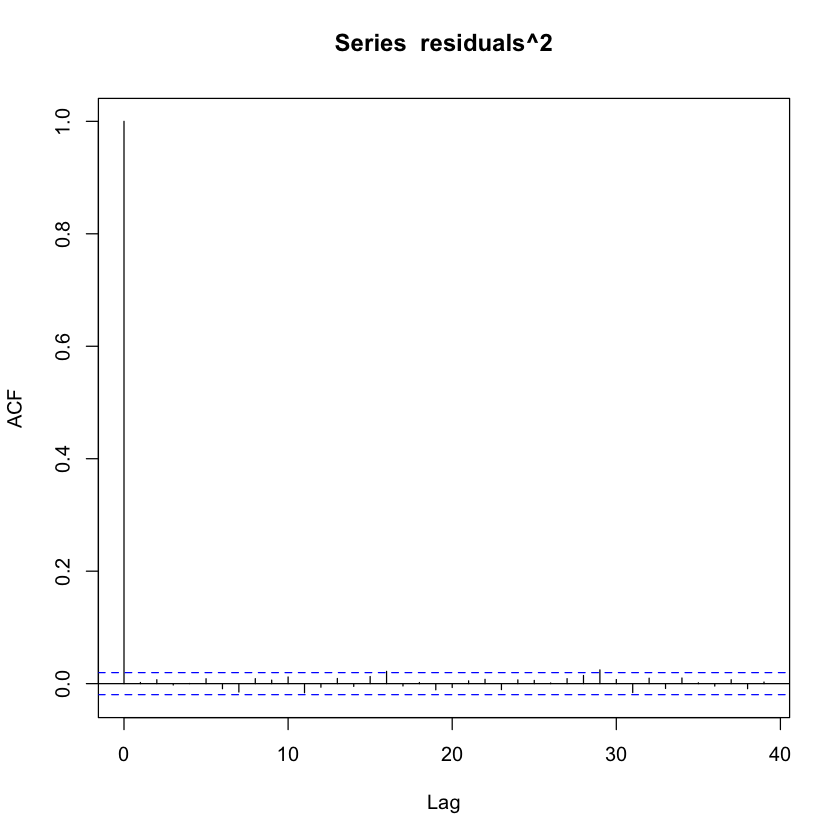

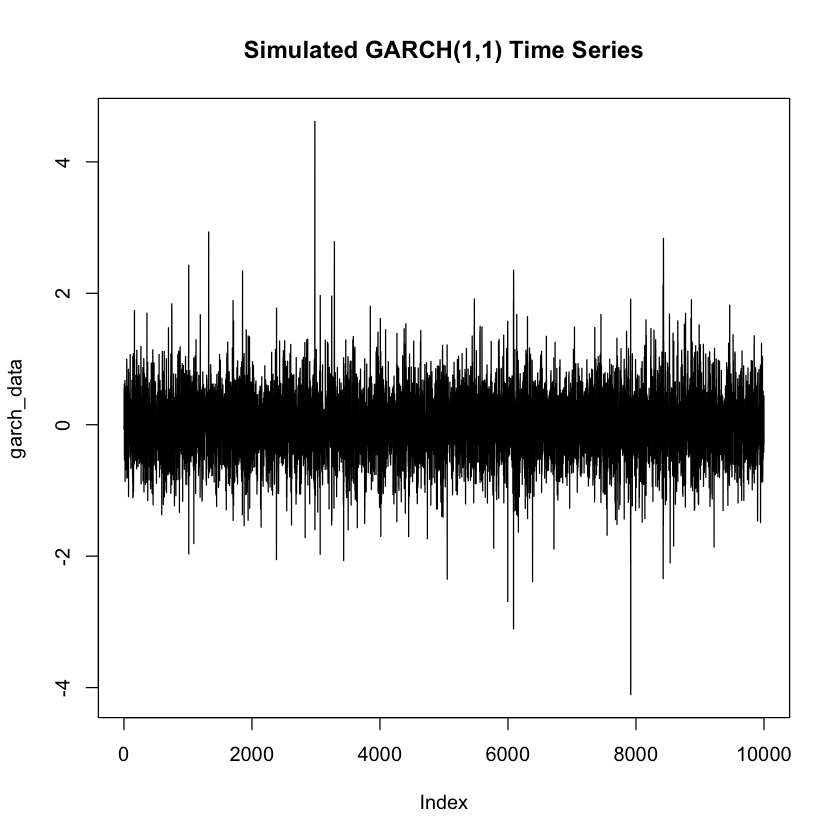

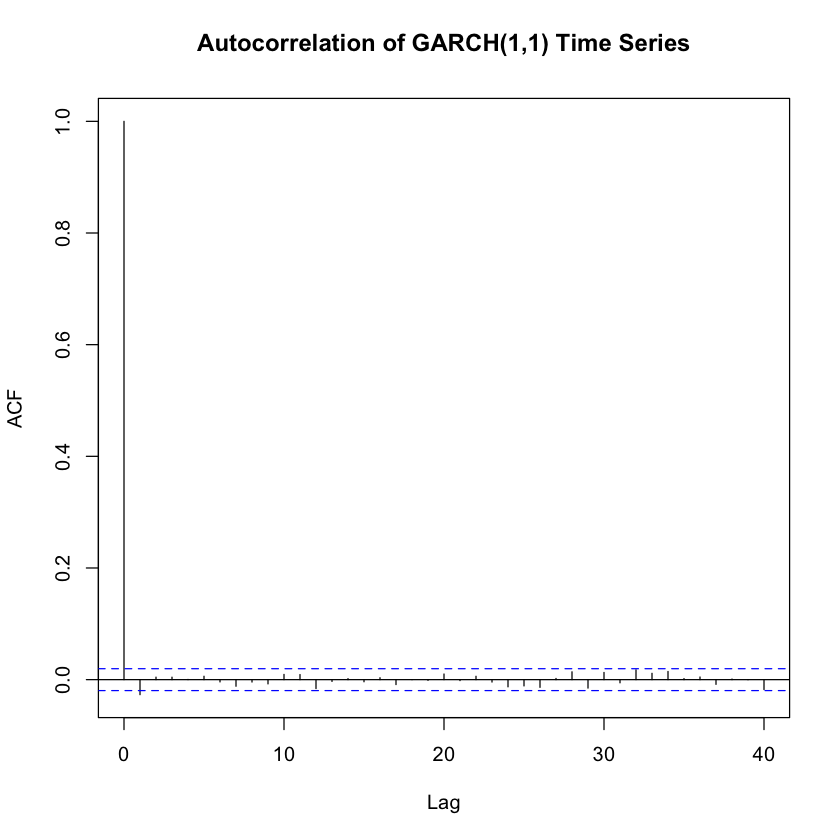

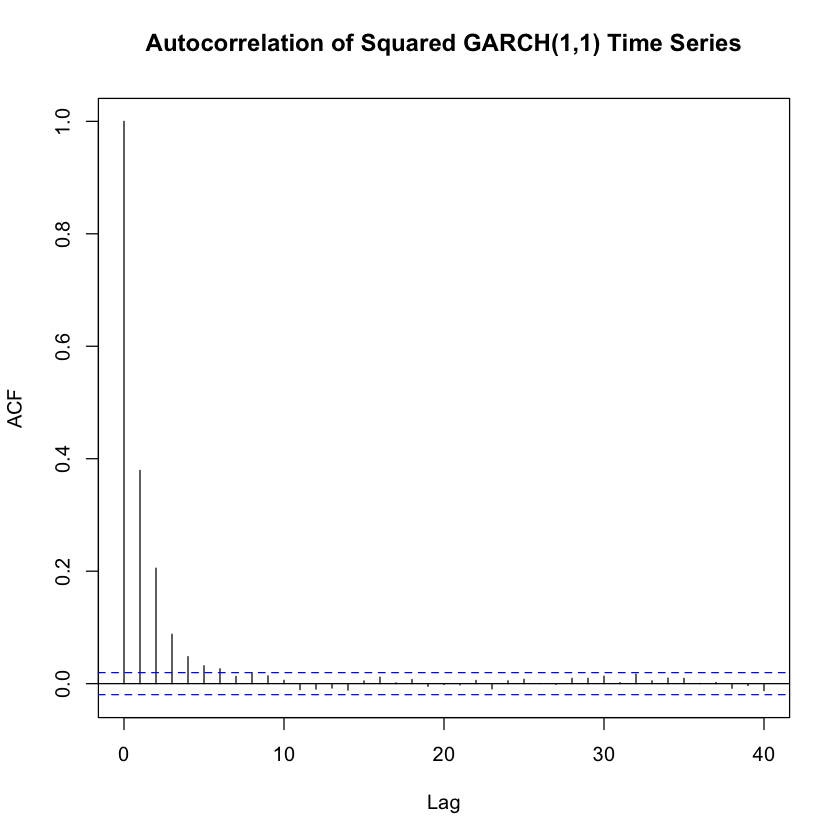

In [78]:
#Simulate a GARCH(1,1) time series

set.seed(123)
n <- 10000
a0 <- 0.1
a1 <- 0.4
b1 <- 0.2
w <- rnorm(n)
garch_data <- rep(0, n)
h <- rep(0, n)

for (i in 2:n) {
  h[i] <- a0 + a1 * (garch_data[i - 1]^2) + b1 * h[i - 1]
  garch_data[i] <- w[i] * sqrt(h[i])
}

# Fit a garch model
garch_model <- garch(garch_data, order = c(1,1))
summary(garch_model)

# Validation
residuals <- garch_model$res[-1]
plot(residuals,type="l")
acf(residuals)
acf(residuals^2)
confint(garch_model)

# Plot the simulated GARCH(1,1) time series
plot(garch_data, type = "l", main = "Simulated GARCH(1,1) Time Series")

# Plot the autocorrelation of the simulated GARCH(1,1) time series
acf(garch_data, main = "Autocorrelation of GARCH(1,1) Time Series")

# Plot the autocorrelation of the squared simulated GARCH(1,1) time series
acf(garch_data^2, main = "Autocorrelation of Squared GARCH(1,1) Time Series")



1. Model Simulation:
   - A GARCH(1,1) time series is simulated with parameters $(a_0 = 0.1)$, $(a_1 = 0.4)$, and $(b_1 = 0.2)$, along with white noise innovations.

2. Model Fitting:
   - A GARCH(1,1) model is fitted to the simulated data using the `garch` function.
   - The model summary displays the estimated coefficients for $(a_0)$, $(a_1)$, and $(b_1)$, along with their standard errors and significance levels.
   - The estimated coefficients are found to be statistically significant at a high significance level (p < 0.001), indicating a strong effect of both the lagged squared error term and the lagged conditional variance on the current conditional variance.

3. Residual Analysis:
   - The residuals from the GARCH(1,1) model are extracted and plotted to visualize their behavior. 
   - The autocorrelation function (ACF) of the residuals and the ACF of the squared residuals are plotted to assess any remaining temporal dependencies or heteroscedasticity.
   - Diagnostic tests, including the Jarque-Bera test and the Box-Ljung test, are conducted on the residuals and squared residuals, respectively, to evaluate the model's goodness-of-fit.
   - The Jarque-Bera test statistic's p-value (0.9236) and the Box-Ljung test statistic's p-value (0.8364) suggest no evidence of non-normality in the residuals or significant autocorrelation in the squared residuals, indicating a satisfactory fit of the GARCH(1,1) model to the simulated data. Thus the above results confirm IID noise.

4. Parameter Confidence Intervals:
   - The 95% confidence intervals for the estimated parameters $(a_0)$, $(a_1)$, and $(b_1)$ are provided, indicating the range of good values for the parameters.

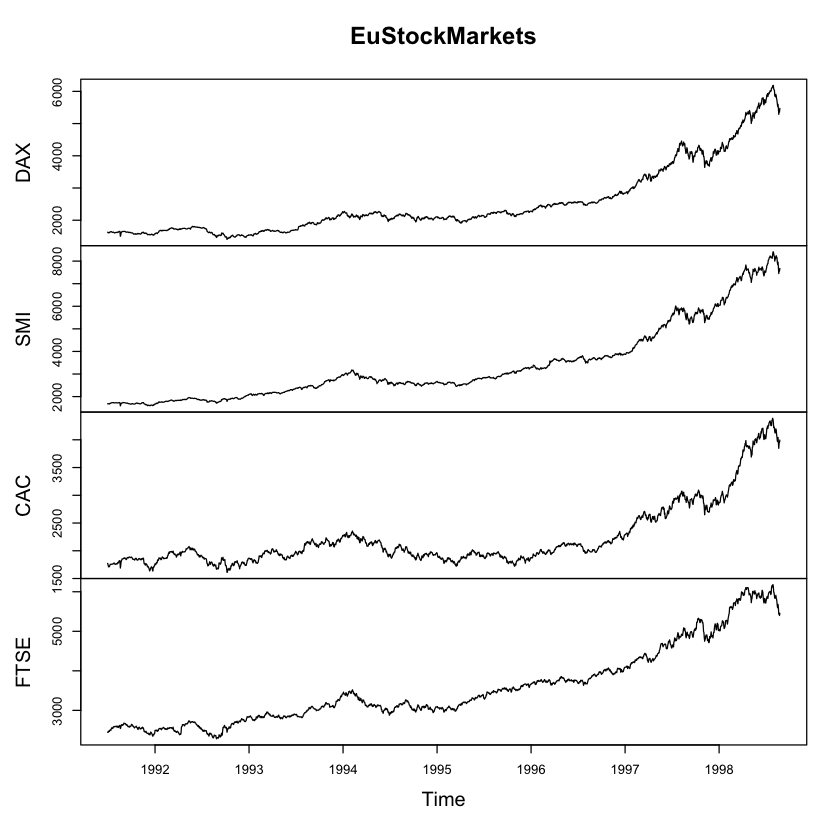

,DAX,SMI,CAC,FTSE
DAX,1.0000000,0.7031219,0.7344304,0.6394674
SMI,0.7031219,1.0000000,0.6160454,0.5847791
CAC,0.7344304,0.6160454,1.0000000,0.6485679
FTSE,0.6394674,0.5847791,0.6485679,1.0000000


,DAX,SMI,CAC,FTSE
DAX,1.0000000,0.8046436,0.7391672,0.3944744
SMI,0.8046436,1.0000000,0.6503782,0.3493051
CAC,0.7391672,0.6503782,1.0000000,0.4196528
FTSE,0.3944744,0.3493051,0.4196528,1.0000000


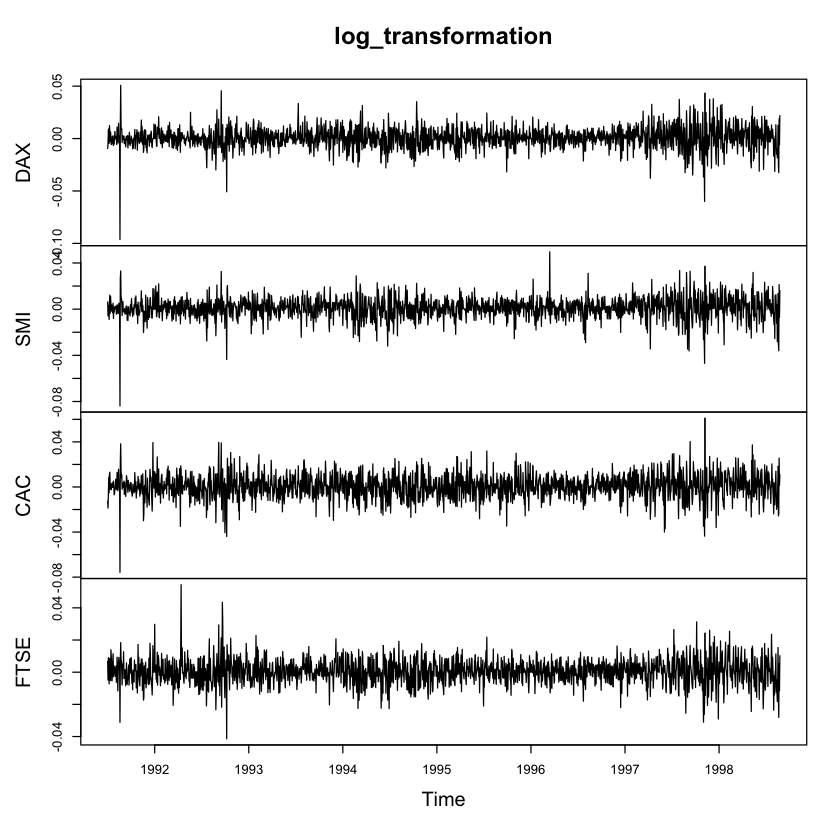

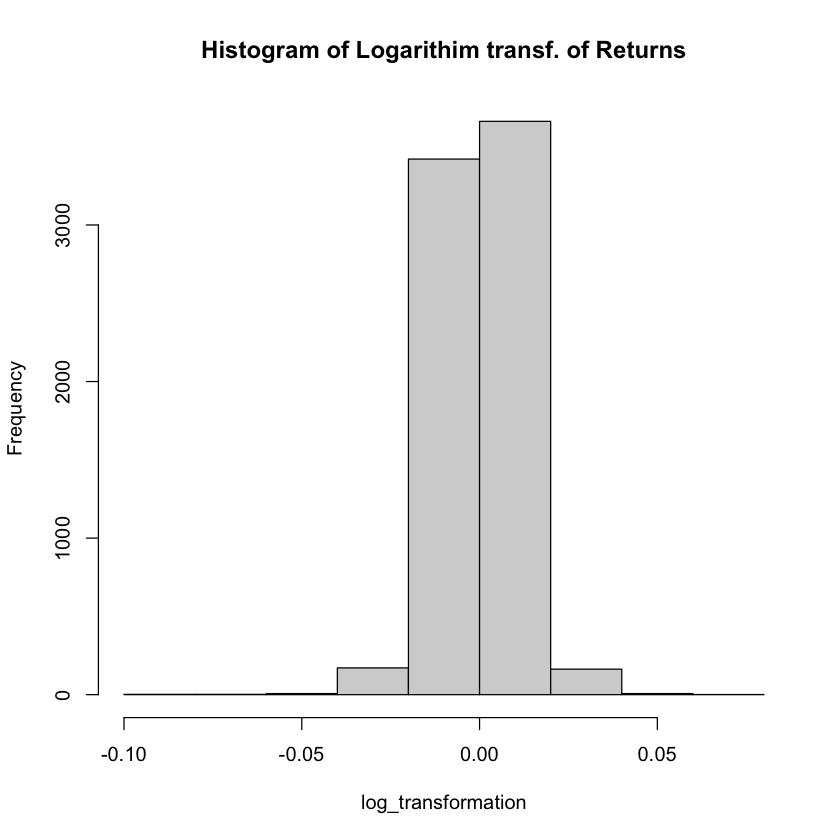


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
omega      5e-06           0   13.095        0
alpha1     5e-02          NA       NA       NA
beta1      9e-01          NA       NA       NA

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
omega      5e-06       2e-06   3.1864  0.00144
alpha1     5e-02          NA       NA       NA
beta1      9e-01          NA       NA       NA

LogLikelihood : 5959.252 

Information Criteria
------------------------------------
                    
Akaike       -6.4102
Bayes        -6.4072
Shibata      -6.4102
Hannan-Quinn -6.4091

Weighted Ljung-Box Test on Standardized Residuals
------------------------------------
           

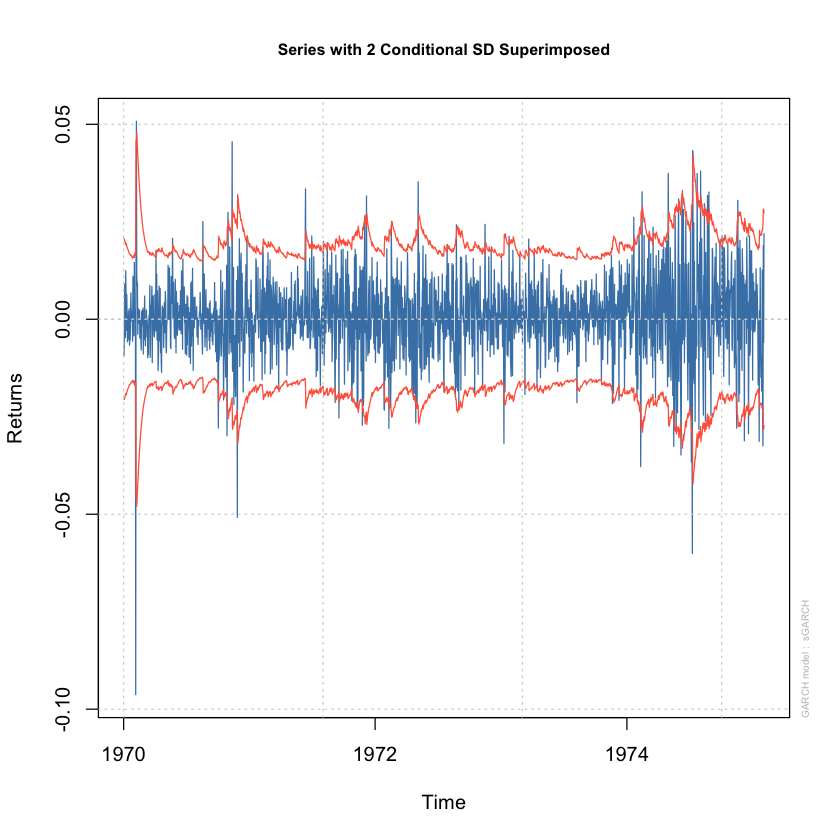

In [95]:
library(rugarch)
# Fit a GARCH model to the logarithmic transformation of series in EuStockMarkets dataset
data(EuStockMarkets)

# Logarithmic transformation
log_transformation <- diff(log(EuStockMarkets) )
plot(EuStockMarkets)
plot(log_transformation)

# Fit a garch model
spec <- ugarchspec(variance.model = list(model = "sGARCH", garchOrder = c(1, 1)), 
                   mean.model = list(armaOrder = c(0,0), include.mean = FALSE),
                   fixed.pars = list(alpha1 = 0.05, beta1 = 0.9))

garch_fit <- ugarchfit(data = log_transformation, spec = spec, solver.control = list(trace=0))

# Check the stylized facts

# Uncorrelation
cor(log_transformation)

# Correlation of the squares
log_transformation_2 <- log_transformation^2
cor(log_transformation_2)

# Heavy tails
hist(log_transformation, breaks = 10, main = "Histogram of Logarithim transf. of Returns")

# Volatility clustering
plot(garch_fit, which = 1, main = "Volatility Plot")

# Check the fitted model
print(garch_fit)




For the last part, we fitted GARCH(1,1) to EuStockMarkets dataset, where we worked with logarithimic differnced series and checked  the stylized facts.